Here we to extract relevant data from "BuildingConstructionPriceIndex_BCPI_18100135.csv" to build a df for each city.
Each dataframe contain a column including price indexes -BCPI- for each type of residential construction.

In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns

from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

index = 100 = 2017

In [5]:
#Processing building_material_indexes dataframes & raw_material_index 
from distutils.command.build import build

#Loading the csv of building construction price indexes
building_const_pi_df = pd.read_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Real Estate Data\18100135-eng\BuildingConstructionPriceIndex_BCPI_18100135.csv")

# type_of_buldings = building_const_pi_df["Type of building"].unique()
# print(type_of_buldings)

type_building_to_drop = ['Non-residential buildings [622]', 'Commercial buildings [62212]', 'Office building', 'Warehouse', 'Shopping centre', 'Industrial buildings [62211]', 
                        'Factory', 'Bus depot with maintenance and repair facilities', 'Institutional buildings [62213]', 'School']

#Removing rows that include strings in type_building_to_drop to maitain only buildings of interest.
building_const_pi_df = building_const_pi_df[~building_const_pi_df['Type of building'].isin(['Non-residential buildings [622]', 'Commercial buildings [62212]', 'Office building', 'Warehouse', 'Shopping centre', 
                        'Industrial buildings [62211]', 'Factory', 'Bus depot with maintenance and repair facilities', 'Institutional buildings [62213]', 'School'])]

#Removing rows with irrelevant GEO locations, we want to keep Cities only
building_const_pi_df = building_const_pi_df[~building_const_pi_df['GEO'].isin(['Eleven census metropolitan area composite'])]
building_const_pi_df

#Dropping irrelevant columns such as Symbols, status, vector...
building_const_pi_df = building_const_pi_df.drop(columns=['DGUID','SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE','STATUS','SYMBOL','TERMINATED', 'UOM_ID','DECIMALS'], axis = 1)
building_const_pi_df.head(100)

building_const_pi_df.tail()

# firstval = building_const_pi_df.VALUE.notna().idxmax()
#First non NAN in VALUE column at index = 5410

building_const_pi_df = building_const_pi_df.truncate(before = 5410)
building_const_pi_df.reset_index()

# building_const_pi_df.drop(columns=["index"], inplace = True, axis = 1)
building_const_pi_df

,REF_DATE,GEO,Type of building,UOM,VALUE
5410,1988-01,"Halifax, Nova Scotia",High-rise apartment building (five or more sto...,"Index, 2017=100",55.4
5411,1988-01,"Halifax, Nova Scotia",Low-rise apartment building (fewer than five s...,"Index, 2017=100",NaN
5412,1988-01,"Halifax, Nova Scotia",Single-detached house,"Index, 2017=100",NaN
5413,1988-01,"Halifax, Nova Scotia",Townhouse,"Index, 2017=100",NaN
5424,1988-01,"Moncton, New Brunswick",Residential buildings [621],"Index, 2017=100",NaN
...,...,...,...,...,...
32049,2022-07,"Vancouver, British Columbia",Apartment buildings,"Index, 2017=100",144.4
32050,2022-07,"Vancouver, British Columbia",High-rise apartment building (five or more sto...,"Index, 2017=100",136.5
32051,2022-07,"Vancouver, British Columbia",Low-rise apartment building (fewer than five s...,"Index, 2017=100",150.9
32052,2022-07,"Vancouver, British Columbia",Single-detached house,"Index, 2017=100",152.6


In [6]:
#Determining the different cities/GEO column
locations = building_const_pi_df.GEO.unique()
print(locations)

# List of Cities of interest
# 'Halifax, Nova Scotia' , 'Moncton, New Brunswick' , 'Montréal, Quebec', 'Ottawa-Gatineau, Ontario part, Ontario/Quebec' , 'Toronto, Ontario' , 
# 'Winnipeg, Manitoba' , 'Saskatoon, Saskatchewan' , 'Calgary, Alberta' , 'Edmonton, Alberta' , 'Vancouver, British Columbia', "St. John's, Newfoundland and Labrador".

['Halifax, Nova Scotia' 'Moncton, New Brunswick' 'Montréal, Quebec'
 'Ottawa-Gatineau, Ontario part, Ontario/Quebec' 'Toronto, Ontario'
 'Winnipeg, Manitoba' 'Saskatoon, Saskatchewan' 'Calgary, Alberta'
 'Edmonton, Alberta' 'Vancouver, British Columbia'
 "St. John's, Newfoundland and Labrador"]


In [7]:
type_of_buldings = building_const_pi_df["Type of building"].unique()
print(type_of_buldings)

['High-rise apartment building (five or more storeys)'
 'Low-rise apartment building (fewer than five storeys)'
 'Single-detached house' 'Townhouse' 'Residential buildings [621]'
 'Apartment buildings']


In [8]:
# We use building_const_pi_df to extract df for each city with column for each type of residential construction price indexes.
# # BCPI stands for Building Construction Price Indexes.
# Here we build dataframe for historical construction price indexes for Vancouver BC, for the six types of residential constructions.

from functools import reduce

# Vancouver, British Columbia

#Vancouver Apartment buildings
vancouver_aprt_build = building_const_pi_df[(building_const_pi_df['GEO']=='Vancouver, British Columbia') & (building_const_pi_df["Type of building"] == "Apartment buildings")]
vancouver_aprt_build = vancouver_aprt_build.reset_index()
vancouver_aprt_build = vancouver_aprt_build.rename(columns ={"VALUE": "Vancouver_aptBldg_BCPI"})
vancouver_aprt_build.drop(columns=["index"], axis = 1, inplace = True)
vancouver_aprt_build

#Vancouver High-rise apartment building

vancouver_high_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Vancouver, British Columbia') & (building_const_pi_df["Type of building"] == "High-rise apartment building (five or more storeys)")]
vancouver_high_rise = vancouver_high_rise.reset_index()
vancouver_high_rise = vancouver_high_rise.rename(columns ={"VALUE": "Vancouver_highriseBldg_BCPI"})
vancouver_high_rise.drop(columns=["index"], axis = 1, inplace = True)
vancouver_high_rise

#Vancouver Low-rise apartment building

vancouver_low_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Vancouver, British Columbia') & (building_const_pi_df["Type of building"] == "Low-rise apartment building (fewer than five storeys)")]
vancouver_low_rise = vancouver_low_rise.reset_index()
vancouver_low_rise = vancouver_low_rise.rename(columns ={"VALUE": "Vancouver_lowriseBldg_BCPI"})
vancouver_low_rise.drop(columns=["index"], axis = 1, inplace = True)
vancouver_low_rise

#Vancouver Single-detached house

vancouver_single_det_house = building_const_pi_df[(building_const_pi_df['GEO']=='Vancouver, British Columbia') & (building_const_pi_df["Type of building"] == "Single-detached house")]
vancouver_single_det_house = vancouver_low_rise.reset_index()
vancouver_single_det_house = vancouver_single_det_house.rename(columns ={"VALUE": "Vancouver_singdethouse_BCPI"})
vancouver_single_det_house.drop(columns=["index"], axis = 1, inplace = True)
vancouver_single_det_house

#Vancouver, 'Residential buildings [621]

vancouver_res_buildings = building_const_pi_df[(building_const_pi_df['GEO']=='Vancouver, British Columbia') & (building_const_pi_df["Type of building"] == "Residential buildings [621]")]
vancouver_res_buildings = vancouver_res_buildings.reset_index()
vancouver_res_buildings = vancouver_res_buildings.rename(columns ={"VALUE": "Vancouver_residbld_BCPI"})
vancouver_res_buildings.drop(columns=["index"], axis = 1, inplace = True)
vancouver_res_buildings

#Vancouver Townhouse

vancouver_townhouse = building_const_pi_df[(building_const_pi_df['GEO']=='Vancouver, British Columbia') & (building_const_pi_df["Type of building"] == "Townhouse")]
vancouver_townhouse = vancouver_townhouse.reset_index()
vancouver_townhouse = vancouver_townhouse.rename(columns ={"VALUE": "Vancouver_townhouse_BCPI"})
vancouver_townhouse.drop(columns=["index"], axis = 1, inplace = True)
vancouver_townhouse

# # Previewing
# vancouver_aprt_build

#Merging dataframes on REF_DATE
dataframes = [vancouver_aprt_build, vancouver_high_rise, vancouver_low_rise, vancouver_res_buildings, vancouver_single_det_house, vancouver_townhouse]
vancouver_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes)

# #Dropping columns to keep only HPI columns of cities
vancouver_bcpi_merged_df = vancouver_bcpi_merged_df.drop(vancouver_bcpi_merged_df.filter(regex = 'GEO').columns, axis = 1)
vancouver_bcpi_merged_df = vancouver_bcpi_merged_df.drop(vancouver_bcpi_merged_df.filter(regex = 'UOM').columns, axis = 1)
vancouver_bcpi_merged_df = vancouver_bcpi_merged_df.drop(vancouver_bcpi_merged_df.filter(regex = 'Type of building').columns, axis = 1)

#Saving dataframe as csv
vancouver_bcpi_merged_df.to_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Processed Data\bcpi_dfs\vancouver_bcpi_merged_df.csv")
#Renaming VALUE_ columns to give specific title for each type of construction
# vancouver_bcpi_merged_df = vancouver_bcpi_merged_df.rename(columns = {vancouver_bcpi_merged_df.columns[] : 'BCPI_Apartment_Buildings'})

vancouver_bcpi_merged_df

C:\Users\hp\AppData\Local\Temp\ipykernel_22440\3728213488.py:61: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  vancouver_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes)
C:\Users\hp\AppData\Local\Temp\ipykernel_22440\3728213488.py:61: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  vancouver_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes)


,REF_DATE,Vancouver_aptBldg_BCPI,Vancouver_highriseBldg_BCPI,Vancouver_lowriseBldg_BCPI_x,Vancouver_residbld_BCPI,Vancouver_lowriseBldg_BCPI_y,Vancouver_townhouse_BCPI
0,1988-01,NaN,43.7,NaN,NaN,NaN,NaN
1,1988-04,NaN,43.9,NaN,NaN,NaN,NaN
2,1988-07,NaN,45.1,NaN,NaN,NaN,NaN
3,1988-10,NaN,45.9,NaN,NaN,NaN,NaN
4,1989-01,NaN,47.2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
134,2021-07,126.7,121.3,131.0,128.4,131.0,133.0
135,2021-10,132.1,125.7,137.1,133.9,137.1,138.8
136,2022-01,137.7,129.8,144.4,139.9,144.4,146.2
137,2022-04,141.7,133.8,148.4,144.0,148.4,150.4


In [9]:
# Halifax, Nova Scotia

# We use building_const_pi_df to extract df for each city with column for each type of residential construction price indexes.
# BCPI stands for Building Construction Price Indexes.
# Here we build dataframe for historical construction price indexes for Vancouver BC, for the six types of residential constructions.

# Halifax, Nova Scotia Apartment buildings
halifaxns_aprt_build = building_const_pi_df[(building_const_pi_df['GEO']=='Halifax, Nova Scotia') & (building_const_pi_df["Type of building"] == "Apartment buildings")]
halifaxns_aprt_build = halifaxns_aprt_build.reset_index()
halifaxns_aprt_build = halifaxns_aprt_build.rename(columns ={"VALUE": "Halifax_aptBldg_BCPI"})
halifaxns_aprt_build.drop(columns=["index"], axis = 1, inplace = True)
halifaxns_aprt_build

# Halifax, Nova Scotia High-rise apartment building

halifaxns_high_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Halifax, Nova Scotia') & (building_const_pi_df["Type of building"] == "High-rise apartment building (five or more storeys)")]
halifaxns_high_rise = halifaxns_high_rise.reset_index()
halifaxns_high_rise = halifaxns_high_rise.rename(columns ={"VALUE": "Halifax_highriseBldg_BCPI"})
halifaxns_high_rise.drop(columns=["index"], axis = 1, inplace = True)
halifaxns_high_rise

# Halifax, Nova Scotia Low-rise apartment building

halifaxns_low_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Halifax, Nova Scotia') & (building_const_pi_df["Type of building"] == "Low-rise apartment building (fewer than five storeys)")]
halifaxns_low_rise = halifaxns_low_rise.reset_index()
halifaxns_low_rise = halifaxns_low_rise.rename(columns ={"VALUE": "Halifax_lowriseBldg_BCPI"})
halifaxns_low_rise.drop(columns=["index"], axis = 1, inplace = True)
halifaxns_low_rise

# Halifax, Nova Scotia Single-detached house

halifaxns_single_det_house = building_const_pi_df[(building_const_pi_df['GEO']=='Halifax, Nova Scotia') & (building_const_pi_df["Type of building"] == "Single-detached house")]
halifaxns_single_det_house = halifaxns_single_det_house.reset_index()
halifaxns_single_det_house = halifaxns_single_det_house.rename(columns ={"VALUE": "Halifax_singdethouse_BCPI"})
halifaxns_single_det_house.drop(columns=["index"], axis = 1, inplace = True)
halifaxns_single_det_house

# Halifax, Nova Scotia, Residential buildings [621]

halifaxns_res_buildings = building_const_pi_df[(building_const_pi_df['GEO']=='Halifax, Nova Scotia') & (building_const_pi_df["Type of building"] == "Residential buildings [621]")]
halifaxns_res_buildings = halifaxns_res_buildings.reset_index()
halifaxns_res_buildings = halifaxns_res_buildings.rename(columns ={"VALUE": "Halifax_residbld_BCPI"})
halifaxns_res_buildings.drop(columns=["index"], axis = 1, inplace = True)
halifaxns_res_buildings

# Halifax, Nova Scotia Townhouse

halifaxns_townhouse = building_const_pi_df[(building_const_pi_df['GEO']=='Halifax, Nova Scotia') & (building_const_pi_df["Type of building"] == "Townhouse")]
halifaxns_townhouse = halifaxns_townhouse.reset_index()
halifaxns_townhouse = halifaxns_townhouse.rename(columns ={"VALUE": "Halifax_townhouse_BCPI"})
halifaxns_townhouse.drop(columns=["index"], axis = 1, inplace = True)
halifaxns_townhouse

# # Previewing
# halifaxns_aprt_build

#Merging dataframes on REF_DATE
dataframes_halifax = [halifaxns_aprt_build, halifaxns_high_rise, halifaxns_low_rise, halifaxns_res_buildings, halifaxns_single_det_house, halifaxns_townhouse]
halifax_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_halifax)

# #Dropping columns to keep only HPI columns of cities
halifax_bcpi_merged_df = halifax_bcpi_merged_df.drop(halifax_bcpi_merged_df.filter(regex = 'GEO').columns, axis = 1)
halifax_bcpi_merged_df = halifax_bcpi_merged_df.drop(halifax_bcpi_merged_df.filter(regex = 'UOM').columns, axis = 1)
halifax_bcpi_merged_df = halifax_bcpi_merged_df.drop(halifax_bcpi_merged_df.filter(regex = 'Type of building').columns, axis = 1)

#Saving dataframe as csv
halifax_bcpi_merged_df.to_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Processed Data\bcpi_dfs\halifax_bcpi_merged_df.csv")

#Renaming VALUE_ columns to give specific title for each type of construction
# vancouver_bcpi_merged_df = vancouver_bcpi_merged_df.rename(columns = {vancouver_bcpi_merged_df.columns[] : 'BCPI_Apartment_Buildings'})

halifax_bcpi_merged_df

C:\Users\hp\AppData\Local\Temp\ipykernel_22440\2221997088.py:59: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  halifax_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_halifax)
C:\Users\hp\AppData\Local\Temp\ipykernel_22440\2221997088.py:59: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  halifax_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_halifax)


,REF_DATE,Halifax_aptBldg_BCPI,Halifax_highriseBldg_BCPI,Halifax_lowriseBldg_BCPI,Halifax_residbld_BCPI,Halifax_singdethouse_BCPI,Halifax_townhouse_BCPI
0,1988-04,NaN,55.7,NaN,NaN,NaN,NaN
1,1988-07,NaN,56.3,NaN,NaN,NaN,NaN
2,1988-10,NaN,57.0,NaN,NaN,NaN,NaN
3,1989-01,NaN,57.3,NaN,NaN,NaN,NaN
4,1989-04,NaN,58.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
133,2021-07,123.1,116.6,137.9,130.3,141.1,141.7
134,2021-10,126.0,119.4,141.1,133.8,145.3,145.5
135,2022-01,130.9,123.3,148.6,140.0,153.4,153.6
136,2022-04,133.7,125.7,152.2,143.4,157.9,158.0


In [10]:
# Moncton, New-Brunswick

# We use building_const_pi_df to extract df for each city with column for each type of residential construction price indexes.
# BCPI stands for Building Construction Price Indexes.
# Here we build dataframe for historical construction price indexes for Moncton, New Brunswick, for the six types of residential constructions.

# Moncton, New Brunswick Apartment buildings
monctonNb_aprt_build = building_const_pi_df[(building_const_pi_df['GEO']=='Moncton, New Brunswick') & (building_const_pi_df["Type of building"] == "Apartment buildings")]
monctonNb_aprt_build = monctonNb_aprt_build.reset_index()
monctonNb_aprt_build = monctonNb_aprt_build.rename(columns ={"VALUE": "moncton_aptBldg_BCPI"})
monctonNb_aprt_build.drop(columns=["index"], axis = 1, inplace = True)
monctonNb_aprt_build

# Moncton, New Brunswick High-rise apartment building

monctonNb_high_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Moncton, New Brunswick') & (building_const_pi_df["Type of building"] == "High-rise apartment building (five or more storeys)")]
monctonNb_high_rise = monctonNb_high_rise.reset_index()
monctonNb_high_rise = monctonNb_high_rise.rename(columns ={"VALUE": "moncton_highriseBldg_BCPI"})
monctonNb_high_rise.drop(columns=["index"], axis = 1, inplace = True)
monctonNb_high_rise

# Moncton, New Brunswick Low-rise apartment building

monctonNb_low_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Moncton, New Brunswick') & (building_const_pi_df["Type of building"] == "Low-rise apartment building (fewer than five storeys)")]
monctonNb_low_rise = monctonNb_low_rise.reset_index()
monctonNb_low_rise = monctonNb_low_rise.rename(columns ={"VALUE": "moncton_lowriseBldg_BCPI"})
monctonNb_low_rise.drop(columns=["index"], axis = 1, inplace = True)
monctonNb_low_rise

# Moncton, New Brunswick Single-detached house

monctonNb_single_det_house = building_const_pi_df[(building_const_pi_df['GEO']=='Moncton, New Brunswick') & (building_const_pi_df["Type of building"] == "Single-detached house")]
monctonNb_single_det_house = monctonNb_single_det_house.reset_index()
monctonNb_single_det_house = monctonNb_single_det_house.rename(columns ={"VALUE": "moncton_singdethouse_BCPI"})
monctonNb_single_det_house.drop(columns=["index"], axis = 1, inplace = True)
monctonNb_single_det_house

# Moncton, New Brunswick Residential buildings [621]

monctonNb_res_buildings = building_const_pi_df[(building_const_pi_df['GEO']=='Moncton, New Brunswick') & (building_const_pi_df["Type of building"] == "Residential buildings [621]")]
monctonNb_res_buildings = monctonNb_res_buildings.reset_index()
monctonNb_res_buildings = monctonNb_res_buildings.rename(columns ={"VALUE": "moncton_residbld_BCPI"})
monctonNb_res_buildings.drop(columns=["index"], axis = 1, inplace = True)
monctonNb_res_buildings

# Moncton, New Brunswick Townhouse

monctonNb_townhouse = building_const_pi_df[(building_const_pi_df['GEO']=='Moncton, New Brunswick') & (building_const_pi_df["Type of building"] == "Townhouse")]
monctonNb_townhouse = monctonNb_townhouse.reset_index()
monctonNb_townhouse = monctonNb_townhouse.rename(columns ={"VALUE": "moncton_townhouse_BCPI"})
monctonNb_townhouse.drop(columns=["index"], axis = 1, inplace = True)
monctonNb_townhouse

# # Previewing
# halifaxns_aprt_build

#Merging dataframes on REF_DATE
dataframes_moncton = [monctonNb_aprt_build, monctonNb_high_rise, monctonNb_low_rise, monctonNb_res_buildings, monctonNb_single_det_house, monctonNb_townhouse]

moncton_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_moncton)

# #Dropping columns to keep only HPI columns of cities
moncton_bcpi_merged_df = moncton_bcpi_merged_df.drop(moncton_bcpi_merged_df.filter(regex = 'GEO').columns, axis = 1)
moncton_bcpi_merged_df = moncton_bcpi_merged_df.drop(moncton_bcpi_merged_df.filter(regex = 'UOM').columns, axis = 1)
moncton_bcpi_merged_df = moncton_bcpi_merged_df.drop(moncton_bcpi_merged_df.filter(regex = 'Type of building').columns, axis = 1)

#Saving dataframe as csv
moncton_bcpi_merged_df.to_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Processed Data\bcpi_dfs\moncton_bcpi_merged_df.csv")

moncton_bcpi_merged_df


C:\Users\hp\AppData\Local\Temp\ipykernel_22440\1517238562.py:60: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  moncton_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_moncton)
C:\Users\hp\AppData\Local\Temp\ipykernel_22440\1517238562.py:60: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  moncton_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_moncton)


,REF_DATE,moncton_aptBldg_BCPI,moncton_highriseBldg_BCPI,moncton_lowriseBldg_BCPI,moncton_residbld_BCPI,moncton_singdethouse_BCPI,moncton_townhouse_BCPI
0,1988-01,NaN,NaN,NaN,NaN,NaN,NaN
1,1988-04,NaN,NaN,NaN,NaN,NaN,NaN
2,1988-07,NaN,NaN,NaN,NaN,NaN,NaN
3,1988-10,NaN,NaN,NaN,NaN,NaN,NaN
4,1989-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
134,2021-07,123.8,114.8,126.5,125.8,129.0,129.1
135,2021-10,125.0,117.5,127.3,126.9,129.9,130.0
136,2022-01,128.0,120.4,130.2,129.9,133.1,132.8
137,2022-04,131.9,124.6,133.6,133.8,136.7,136.0


In [11]:
# Montreal, Quebec

# We use building_const_pi_df to extract df for each city with column for each type of residential construction price indexes.
# BCPI stands for Building Construction Price Indexes.
# Here we build dataframe for historical construction price indexes for Montreal, QC, for the six types of residential constructions.

# Montreal, QC, Apartment buildings
montreal_aprt_build = building_const_pi_df[(building_const_pi_df['GEO']=='Montréal, Quebec') & (building_const_pi_df["Type of building"] == "Apartment buildings")]
montreal_aprt_build = montreal_aprt_build.reset_index()
montreal_aprt_build = montreal_aprt_build.rename(columns ={"VALUE": "montreal_aptBldg_BCPI"})
montreal_aprt_build.drop(columns=["index"], axis = 1, inplace = True)
montreal_aprt_build

# Montreal, QC, High-rise apartment building

montreal_high_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Montréal, Quebec') & (building_const_pi_df["Type of building"] == "High-rise apartment building (five or more storeys)")]
montreal_high_rise = montreal_high_rise.reset_index()
montreal_high_rise = montreal_high_rise.rename(columns ={"VALUE": "montreal_highriseBldg_BCPI"})
montreal_high_rise.drop(columns=["index"], axis = 1, inplace = True)
montreal_high_rise

# Montreal, QC, Low-rise apartment building

montreal_low_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Montréal, Quebec') & (building_const_pi_df["Type of building"] == "Low-rise apartment building (fewer than five storeys)")]
montreal_low_rise = montreal_low_rise.reset_index()
montreal_low_rise = montreal_low_rise.rename(columns ={"VALUE": "montreal_lowriseBldg_BCPI"})
montreal_low_rise.drop(columns=["index"], axis = 1, inplace = True)
montreal_low_rise

# Montreal, QC, Single-detached house

montreal_single_det_house = building_const_pi_df[(building_const_pi_df['GEO']=='Montréal, Quebec') & (building_const_pi_df["Type of building"] == "Single-detached house")]
montreal_single_det_house = montreal_single_det_house.reset_index()
montreal_single_det_house = montreal_single_det_house.rename(columns ={"VALUE": "montreal_singdethouse_BCPI"})
montreal_single_det_house.drop(columns=["index"], axis = 1, inplace = True)
montreal_single_det_house

# Montreal, QC, Residential buildings [621]

montreal_res_buildings = building_const_pi_df[(building_const_pi_df['GEO']=='Montréal, Quebec') & (building_const_pi_df["Type of building"] == "Residential buildings [621]")]
montreal_res_buildings = montreal_res_buildings.reset_index()
montreal_res_buildings = montreal_res_buildings.rename(columns ={"VALUE": "montreal_residbld_BCPI"})
montreal_res_buildings.drop(columns=["index"], axis = 1, inplace = True)
montreal_res_buildings

# Montreal, QC, Townhouse

montreal_townhouse = building_const_pi_df[(building_const_pi_df['GEO']=='Montréal, Quebec') & (building_const_pi_df["Type of building"] == "Townhouse")]
montreal_townhouse = montreal_townhouse.reset_index()
montreal_townhouse = montreal_townhouse.rename(columns ={"VALUE": "montreal_townhouse_BCPI"})
montreal_townhouse.drop(columns=["index"], axis = 1, inplace = True)
montreal_townhouse

#Merging dataframes on REF_DATE
dataframes_montreal = [montreal_aprt_build, monctonNb_high_rise, montreal_low_rise, montreal_res_buildings, montreal_single_det_house, montreal_townhouse]

montreal_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_montreal)

# #Dropping columns to keep only HPI columns of cities
montreal_bcpi_merged_df = montreal_bcpi_merged_df.drop(montreal_bcpi_merged_df.filter(regex = 'GEO').columns, axis = 1)
montreal_bcpi_merged_df = montreal_bcpi_merged_df.drop(montreal_bcpi_merged_df.filter(regex = 'UOM').columns, axis = 1)
montreal_bcpi_merged_df = montreal_bcpi_merged_df.drop(montreal_bcpi_merged_df.filter(regex = 'Type of building').columns, axis = 1)

#Saving dataframe as csv
montreal_bcpi_merged_df.to_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Processed Data\bcpi_dfs\montreal_bcpi_merged_df.csv")

montreal_bcpi_merged_df

C:\Users\hp\AppData\Local\Temp\ipykernel_22440\477098075.py:57: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  montreal_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_montreal)
C:\Users\hp\AppData\Local\Temp\ipykernel_22440\477098075.py:57: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  montreal_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_montreal)


,REF_DATE,montreal_aptBldg_BCPI,moncton_highriseBldg_BCPI,montreal_lowriseBldg_BCPI,montreal_residbld_BCPI,montreal_singdethouse_BCPI,montreal_townhouse_BCPI
0,1988-01,NaN,NaN,NaN,NaN,NaN,NaN
1,1988-04,NaN,NaN,NaN,NaN,NaN,NaN
2,1988-07,NaN,NaN,NaN,NaN,NaN,NaN
3,1988-10,NaN,NaN,NaN,NaN,NaN,NaN
4,1989-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
134,2021-07,129.7,114.8,130.9,129.5,128.7,130.1
135,2021-10,136.1,117.5,137.5,135.9,134.9,136.8
136,2022-01,142.4,120.4,144.0,142.0,140.8,142.9
137,2022-04,146.8,124.6,148.5,146.5,145.4,147.3


In [12]:
# Ottawa-Gatineau, Ontario

# We use building_const_pi_df to extract df for each city with column for each type of residential construction price indexes.
# BCPI stands for Building Construction Price Indexes.
# Here we build dataframe for historical construction price indexes for Ottawa-Gatineau, Ontario part, for the six types of residential constructions.

# Ottawa-Gatineau, Ont Apartment buildings
ottawaGat_aprt_build = building_const_pi_df[(building_const_pi_df['GEO']=='Ottawa-Gatineau, Ontario part, Ontario/Quebec') & (building_const_pi_df["Type of building"] == "Apartment buildings")]
ottawaGat_aprt_build = ottawaGat_aprt_build.reset_index()
ottawaGat_aprt_build = ottawaGat_aprt_build.rename(columns ={"VALUE": "ottawaGat_aptBldg_BCPI"})
ottawaGat_aprt_build.drop(columns=["index"], axis = 1, inplace = True)
ottawaGat_aprt_build

# Ottawa-Gatineau, Ont, High-rise apartment building

ottawaGat_high_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Ottawa-Gatineau, Ontario part, Ontario/Quebec') & (building_const_pi_df["Type of building"] == "High-rise apartment building (five or more storeys)")]
ottawaGat_high_rise = ottawaGat_high_rise.reset_index()
ottawaGat_high_rise = ottawaGat_high_rise.rename(columns ={"VALUE": "ottawaGat_highriseBldg_BCPI"})
ottawaGat_high_rise.drop(columns=["index"], axis = 1, inplace = True)
ottawaGat_high_rise

# Ottawa-Gatineau, Ont, Low-rise apartment building

ottawaGat_low_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Ottawa-Gatineau, Ontario part, Ontario/Quebec') & (building_const_pi_df["Type of building"] == "Low-rise apartment building (fewer than five storeys)")]
ottawaGat_low_rise = ottawaGat_low_rise.reset_index()
ottawaGat_low_rise = ottawaGat_low_rise.rename(columns ={"VALUE": "ottawaGat_lowriseBldg_BCPI"})
ottawaGat_low_rise.drop(columns=["index"], axis = 1, inplace = True)
ottawaGat_low_rise

# Ottawa-Gatineau, Ont, Single-detached house

ottawaGat_single_det_house = building_const_pi_df[(building_const_pi_df['GEO']=='Ottawa-Gatineau, Ontario part, Ontario/Quebec') & (building_const_pi_df["Type of building"] == "Single-detached house")]
ottawaGat_single_det_house = ottawaGat_single_det_house.reset_index()
ottawaGat_single_det_house = ottawaGat_single_det_house.rename(columns ={"VALUE": "ottawaGat_singdethouse_BCPI"})
ottawaGat_single_det_house.drop(columns=["index"], axis = 1, inplace = True)
ottawaGat_single_det_house

# Ottawa-Gatineau, Ont, Residential buildings [621]

ottawaGat_res_buildings = building_const_pi_df[(building_const_pi_df['GEO']=='Ottawa-Gatineau, Ontario part, Ontario/Quebec') & (building_const_pi_df["Type of building"] == "Residential buildings [621]")]
ottawaGat_res_buildings = ottawaGat_res_buildings.reset_index()
ottawaGat_res_buildings = ottawaGat_res_buildings.rename(columns ={"VALUE": "ottawaGat_residbld_BCPI"})
ottawaGat_res_buildings.drop(columns=["index"], axis = 1, inplace = True)
ottawaGat_res_buildings

# Ottawa-Gatineau, Ont, Townhouse

ottawaGat_townhouse = building_const_pi_df[(building_const_pi_df['GEO']=='Ottawa-Gatineau, Ontario part, Ontario/Quebec') & (building_const_pi_df["Type of building"] == "Townhouse")]
ottawaGat_townhouse = ottawaGat_townhouse.reset_index()
ottawaGat_townhouse = ottawaGat_townhouse.rename(columns ={"VALUE": "ottawaGat_townhouse_BCPI"})
ottawaGat_townhouse.drop(columns=["index"], axis = 1, inplace = True)
ottawaGat_townhouse

#Merging dataframes on REF_DATE
dataframes_ottawagat = [ottawaGat_aprt_build, ottawaGat_high_rise, ottawaGat_townhouse, ottawaGat_low_rise, ottawaGat_res_buildings, ottawaGat_single_det_house]

ottawagat_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_ottawagat)

# #Dropping columns to keep only HPI columns of cities
ottawagat_bcpi_merged_df = ottawagat_bcpi_merged_df.drop(ottawagat_bcpi_merged_df.filter(regex = 'GEO').columns, axis = 1)
ottawagat_bcpi_merged_df = ottawagat_bcpi_merged_df.drop(ottawagat_bcpi_merged_df.filter(regex = 'UOM').columns, axis = 1)
ottawagat_bcpi_merged_df = ottawagat_bcpi_merged_df.drop(ottawagat_bcpi_merged_df.filter(regex = 'Type of building').columns, axis = 1)

#Saving dataframe as csv
ottawagat_bcpi_merged_df.to_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Processed Data\bcpi_dfs\ottawaGatineau_bcpi_merged_df.csv")

ottawagat_bcpi_merged_df

C:\Users\hp\AppData\Local\Temp\ipykernel_22440\660167396.py:57: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  ottawagat_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_ottawagat)
C:\Users\hp\AppData\Local\Temp\ipykernel_22440\660167396.py:57: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  ottawagat_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_ottawagat)


,REF_DATE,ottawaGat_aptBldg_BCPI,ottawaGat_highriseBldg_BCPI,ottawaGat_townhouse_BCPI,ottawaGat_lowriseBldg_BCPI,ottawaGat_residbld_BCPI,ottawaGat_singdethouse_BCPI
0,1988-01,NaN,43.4,NaN,NaN,NaN,NaN
1,1988-04,NaN,44.5,NaN,NaN,NaN,NaN
2,1988-07,NaN,45.5,NaN,NaN,NaN,NaN
3,1988-10,NaN,46.3,NaN,NaN,NaN,NaN
4,1989-01,NaN,47.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
134,2021-07,151.4,124.9,156.3,157.1,153.3,152.5
135,2021-10,153.6,128.1,157.6,159.1,155.0,154.2
136,2022-01,160.9,131.9,165.6,167.3,162.9,162.2
137,2022-04,167.9,136.5,173.0,174.9,170.3,169.8


In [13]:
# Toronto, Ontario

# We use building_const_pi_df to extract df for each city with column for each type of residential construction price indexes.
# BCPI stands for Building Construction Price Indexes.
# Here we build dataframe for historical construction price indexes for Toronto, Ontario , for the six types of residential constructions.

# Toronto, Ontario Apartment buildings
toronto_aprt_build = building_const_pi_df[(building_const_pi_df['GEO']=='Toronto, Ontario') & (building_const_pi_df["Type of building"] == "Apartment buildings")]
toronto_aprt_build = toronto_aprt_build.reset_index()
toronto_aprt_build = toronto_aprt_build.rename(columns ={"VALUE": "toronto_aptBldg_BCPI"})
toronto_aprt_build.drop(columns=["index"], axis = 1, inplace = True)
toronto_aprt_build

# Toronto, Ontario High-rise apartment building

toronto_high_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Toronto, Ontario') & (building_const_pi_df["Type of building"] == "High-rise apartment building (five or more storeys)")]
toronto_high_rise = toronto_high_rise.reset_index()
toronto_high_rise = toronto_high_rise.rename(columns ={"VALUE": "toronto_highriseBldg_BCPI"})
toronto_high_rise.drop(columns=["index"], axis = 1, inplace = True)
toronto_high_rise

# Toronto, OntarioLow-rise apartment building

toronto_low_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Toronto, Ontario') & (building_const_pi_df["Type of building"] == "Low-rise apartment building (fewer than five storeys)")]
toronto_low_rise = toronto_low_rise.reset_index()
toronto_low_rise = toronto_low_rise.rename(columns ={"VALUE": "toronto_lowriseBldg_BCPI"})
toronto_low_rise.drop(columns=["index"], axis = 1, inplace = True)
toronto_low_rise

# Toronto, Ontario Single-detached house

toronto_single_det_house = building_const_pi_df[(building_const_pi_df['GEO']=='Toronto, Ontario') & (building_const_pi_df["Type of building"] == "Single-detached house")]
toronto_single_det_house = toronto_single_det_house.reset_index()
toronto_single_det_house = toronto_single_det_house.rename(columns ={"VALUE": "toronto_singdethouse_BCPI"})
toronto_single_det_house.drop(columns=["index"], axis = 1, inplace = True)
toronto_single_det_house

# Toronto, Ontario Residential buildings [621]

toronto_res_buildings = building_const_pi_df[(building_const_pi_df['GEO']=='Toronto, Ontario') & (building_const_pi_df["Type of building"] == "Residential buildings [621]")]
toronto_res_buildings = toronto_res_buildings.reset_index()
toronto_res_buildings = toronto_res_buildings.rename(columns ={"VALUE": "toronto_residbld_BCPI"})
toronto_res_buildings.drop(columns=["index"], axis = 1, inplace = True)
toronto_res_buildings

# Toronto, Ontario Townhouse

toronto_townhouse = building_const_pi_df[(building_const_pi_df['GEO']=='Toronto, Ontario') & (building_const_pi_df["Type of building"] == "Townhouse")]
toronto_townhouse = toronto_townhouse.reset_index()
toronto_townhouse = toronto_townhouse.rename(columns ={"VALUE": "toronto_townhouse_BCPI"})
toronto_townhouse.drop(columns=["index"], axis = 1, inplace = True)
toronto_townhouse

#Merging dataframes on REF_DATE
dataframes_toronto = [toronto_aprt_build, toronto_high_rise, toronto_low_rise, toronto_res_buildings, toronto_townhouse, toronto_single_det_house]

toronto_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_toronto)

# #Dropping columns to keep only HPI columns of cities
toronto_bcpi_merged_df = toronto_bcpi_merged_df.drop(toronto_bcpi_merged_df.filter(regex = 'GEO').columns, axis = 1)
toronto_bcpi_merged_df = toronto_bcpi_merged_df.drop(toronto_bcpi_merged_df.filter(regex = 'UOM').columns, axis = 1)
toronto_bcpi_merged_df = toronto_bcpi_merged_df.drop(toronto_bcpi_merged_df.filter(regex = 'Type of building').columns, axis = 1)

#Saving dataframe as csv
toronto_bcpi_merged_df.to_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Processed Data\bcpi_dfs\toronto_bcpi_merged_df.csv")

toronto_bcpi_merged_df

C:\Users\hp\AppData\Local\Temp\ipykernel_22440\2612219354.py:57: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  toronto_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_toronto)
C:\Users\hp\AppData\Local\Temp\ipykernel_22440\2612219354.py:57: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  toronto_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_toronto)


,REF_DATE,toronto_aptBldg_BCPI,toronto_highriseBldg_BCPI,toronto_lowriseBldg_BCPI,toronto_residbld_BCPI,toronto_townhouse_BCPI,toronto_singdethouse_BCPI
0,1988-01,NaN,44.2,NaN,NaN,NaN,NaN
1,1988-04,NaN,45.4,NaN,NaN,NaN,NaN
2,1988-07,NaN,45.9,NaN,NaN,NaN,NaN
3,1988-10,NaN,46.4,NaN,NaN,NaN,NaN
4,1989-01,NaN,47.2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
134,2021-07,136.3,128.9,146.7,143.1,149.8,150.7
135,2021-10,142.0,134.0,153.3,149.7,157.2,158.6
136,2022-01,150.8,141.5,164.3,160.2,169.1,171.7
137,2022-04,162.1,150.6,179.4,173.0,184.4,186.4


In [14]:
# Winnipeg, Manitoba

# We use building_const_pi_df to extract df for each city with column for each type of residential construction price indexes.
# BCPI stands for Building Construction Price Indexes.
# Here we build dataframe for historical construction price indexes for Winnipeg, Manitoba, for the six types of residential constructions.

# Winnipeg, Manitoba Apartment buildings
winnipeg_aprt_build = building_const_pi_df[(building_const_pi_df['GEO']=='Winnipeg, Manitoba') & (building_const_pi_df["Type of building"] == "Apartment buildings")]
winnipeg_aprt_build = winnipeg_aprt_build.reset_index()
winnipeg_aprt_build = winnipeg_aprt_build.rename(columns ={"VALUE": "winnipeg_aptBldg_BCPI"})
winnipeg_aprt_build.drop(columns=["index"], axis = 1, inplace = True)
winnipeg_aprt_build

# Winnipeg, Manitoba High-rise apartment building

winnipeg_high_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Winnipeg, Manitoba') & (building_const_pi_df["Type of building"] == "High-rise apartment building (five or more storeys)")]
winnipeg_high_rise = winnipeg_high_rise.reset_index()
winnipeg_high_rise = winnipeg_high_rise.rename(columns ={"VALUE": "winnipeg_highriseBldg_BCPI"})
winnipeg_high_rise.drop(columns=["index"], axis = 1, inplace = True)
winnipeg_high_rise

# Winnipeg, Manitoba Low-rise apartment building

winnipeg_low_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Winnipeg, Manitoba') & (building_const_pi_df["Type of building"] == "Low-rise apartment building (fewer than five storeys)")]
winnipeg_low_rise = winnipeg_low_rise.reset_index()
winnipeg_low_rise = winnipeg_low_rise.rename(columns ={"VALUE": "winnipeg_lowriseBldg_BCPI"})
winnipeg_low_rise.drop(columns=["index"], axis = 1, inplace = True)
winnipeg_low_rise

# Winnipeg, Manitoba Single-detached house

winnipeg_single_det_house = building_const_pi_df[(building_const_pi_df['GEO']=='Winnipeg, Manitoba') & (building_const_pi_df["Type of building"] == "Single-detached house")]
winnipeg_single_det_house = winnipeg_single_det_house.reset_index()
winnipeg_single_det_house = winnipeg_single_det_house.rename(columns ={"VALUE": "winnipeg_singdethouse_BCPI"})
winnipeg_single_det_house.drop(columns=["index"], axis = 1, inplace = True)
winnipeg_single_det_house

# Winnipeg, Manitoba Residential buildings [621]

winnipeg_res_buildings = building_const_pi_df[(building_const_pi_df['GEO']=='Winnipeg, Manitoba') & (building_const_pi_df["Type of building"] == "Residential buildings [621]")]
winnipeg_res_buildings = winnipeg_res_buildings.reset_index()
winnipeg_res_buildings = winnipeg_res_buildings.rename(columns ={"VALUE": "winnipeg_residbld_BCPI"})
winnipeg_res_buildings.drop(columns=["index"], axis = 1, inplace = True)
winnipeg_res_buildings

# Winnipeg, Manitoba Townhouse

winnipeg_townhouse = building_const_pi_df[(building_const_pi_df['GEO']=='Winnipeg, Manitoba') & (building_const_pi_df["Type of building"] == "Townhouse")]
winnipeg_townhouse = winnipeg_townhouse.reset_index()
winnipeg_townhouse = winnipeg_townhouse.rename(columns ={"VALUE": "winnipeg_townhouse_BCPI"})
winnipeg_townhouse.drop(columns=["index"], axis = 1, inplace = True)
winnipeg_townhouse

#Merging dataframes on REF_DATE
dataframes_winnipeg = [winnipeg_aprt_build, winnipeg_high_rise, winnipeg_low_rise, winnipeg_res_buildings, winnipeg_single_det_house, winnipeg_townhouse]

winnipeg_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_winnipeg)

# #Dropping columns to keep only HPI columns of cities
winnipeg_bcpi_merged_df = winnipeg_bcpi_merged_df.drop(winnipeg_bcpi_merged_df.filter(regex = 'GEO').columns, axis = 1)
winnipeg_bcpi_merged_df = winnipeg_bcpi_merged_df.drop(winnipeg_bcpi_merged_df.filter(regex = 'UOM').columns, axis = 1)
winnipeg_bcpi_merged_df = winnipeg_bcpi_merged_df.drop(winnipeg_bcpi_merged_df.filter(regex = 'Type of building').columns, axis = 1)

#Saving dataframe as csv
winnipeg_bcpi_merged_df.to_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Processed Data\bcpi_dfs\winnipeg_bcpi_merged_df.csv")

winnipeg_bcpi_merged_df

C:\Users\hp\AppData\Local\Temp\ipykernel_22440\140157251.py:57: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  winnipeg_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_winnipeg)
C:\Users\hp\AppData\Local\Temp\ipykernel_22440\140157251.py:57: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  winnipeg_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_winnipeg)


,REF_DATE,winnipeg_aptBldg_BCPI,winnipeg_highriseBldg_BCPI,winnipeg_lowriseBldg_BCPI,winnipeg_residbld_BCPI,winnipeg_singdethouse_BCPI,winnipeg_townhouse_BCPI
0,1988-01,NaN,NaN,NaN,NaN,NaN,NaN
1,1988-04,NaN,NaN,NaN,NaN,NaN,NaN
2,1988-07,NaN,NaN,NaN,NaN,NaN,NaN
3,1988-10,NaN,NaN,NaN,NaN,NaN,NaN
4,1989-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
134,2021-07,130.9,112.9,135.0,135.8,138.7,140.7
135,2021-10,134.0,115.0,138.4,138.9,141.8,144.1
136,2022-01,138.9,118.2,144.0,144.4,147.6,150.0
137,2022-04,141.8,120.6,147.0,147.7,151.2,153.7


In [15]:
# Saskatoon, Saskatchewan

# We use building_const_pi_df to extract df for each city with column for each type of residential construction price indexes.
# BCPI stands for Building Construction Price Indexes.
# Here we build dataframe for historical construction price indexes for Saskatoon, Saskatchewan for the six types of residential constructions.

# Saskatoon, Saskatchewan Apartment buildings
saskatoon_aprt_build = building_const_pi_df[(building_const_pi_df['GEO']=='Saskatoon, Saskatchewan') & (building_const_pi_df["Type of building"] == "Apartment buildings")]
saskatoon_aprt_build = saskatoon_aprt_build.reset_index()
saskatoon_aprt_build = saskatoon_aprt_build.rename(columns ={"VALUE": "saskatoon_aptBldg_BCPI"})
saskatoon_aprt_build.drop(columns=["index"], axis = 1, inplace = True)
saskatoon_aprt_build

# Saskatoon, Saskatchewan High-rise apartment building

saskatoon_high_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Saskatoon, Saskatchewan') & (building_const_pi_df["Type of building"] == "High-rise apartment building (five or more storeys)")]
saskatoon_high_rise = saskatoon_high_rise.reset_index()
saskatoon_high_rise = saskatoon_high_rise.rename(columns ={"VALUE": "saskatoon_highriseBldg_BCPI"})
saskatoon_high_rise.drop(columns=["index"], axis = 1, inplace = True)
saskatoon_high_rise

# Saskatoon, Saskatchewan Low-rise apartment building

saskatoon_low_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Saskatoon, Saskatchewan') & (building_const_pi_df["Type of building"] == "Low-rise apartment building (fewer than five storeys)")]
saskatoon_low_rise = saskatoon_low_rise.reset_index()
saskatoon_low_rise = saskatoon_low_rise.rename(columns ={"VALUE": "saskatoon_lowriseBldg_BCPI"})
saskatoon_low_rise.drop(columns=["index"], axis = 1, inplace = True)
saskatoon_low_rise

# Saskatoon, Saskatchewan Single-detached house

saskatoon_single_det_house = building_const_pi_df[(building_const_pi_df['GEO']=='Saskatoon, Saskatchewan') & (building_const_pi_df["Type of building"] == "Single-detached house")]
saskatoon_single_det_house = saskatoon_single_det_house.reset_index()
saskatoon_single_det_house = saskatoon_single_det_house.rename(columns ={"VALUE": "saskatoon_singdethouse_BCPI"})
saskatoon_single_det_house.drop(columns=["index"], axis = 1, inplace = True)
saskatoon_single_det_house

# Saskatoon, Saskatchewan Residential buildings [621]

saskatoon_res_buildings = building_const_pi_df[(building_const_pi_df['GEO']=='Saskatoon, Saskatchewan') & (building_const_pi_df["Type of building"] == "Residential buildings [621]")]
saskatoon_res_buildings = saskatoon_res_buildings.reset_index()
saskatoon_res_buildings = saskatoon_res_buildings.rename(columns ={"VALUE": "saskatoon_residbld_BCPI"})
saskatoon_res_buildings.drop(columns=["index"], axis = 1, inplace = True)
saskatoon_res_buildings

# Saskatoon, Saskatchewan Townhouse

saskatoon_townhouse = building_const_pi_df[(building_const_pi_df['GEO']=='Saskatoon, Saskatchewan') & (building_const_pi_df["Type of building"] == "Townhouse")]
saskatoon_townhouse = saskatoon_townhouse.reset_index()
saskatoon_townhouse = saskatoon_townhouse.rename(columns ={"VALUE": "saskatoon_townhouse_BCPI"})
saskatoon_townhouse.drop(columns=["index"], axis = 1, inplace = True)
saskatoon_townhouse

#Merging dataframes on REF_DATE
dataframes_saskatoon = [saskatoon_aprt_build, saskatoon_high_rise, saskatoon_low_rise, saskatoon_res_buildings, saskatoon_single_det_house, saskatoon_townhouse]

saskatoon_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_saskatoon)

# #Dropping columns to keep only HPI columns of cities
saskatoon_bcpi_merged_df = saskatoon_bcpi_merged_df.drop(saskatoon_bcpi_merged_df.filter(regex = 'GEO').columns, axis = 1)
saskatoon_bcpi_merged_df = saskatoon_bcpi_merged_df.drop(saskatoon_bcpi_merged_df.filter(regex = 'UOM').columns, axis = 1)
saskatoon_bcpi_merged_df = saskatoon_bcpi_merged_df.drop(saskatoon_bcpi_merged_df.filter(regex = 'Type of building').columns, axis = 1)

#Saving dataframe as csv
saskatoon_bcpi_merged_df.to_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Processed Data\bcpi_dfs\saskatoon_bcpi_merged_df.csv")

saskatoon_bcpi_merged_df

C:\Users\hp\AppData\Local\Temp\ipykernel_22440\1932908491.py:57: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  saskatoon_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_saskatoon)
C:\Users\hp\AppData\Local\Temp\ipykernel_22440\1932908491.py:57: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  saskatoon_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_saskatoon)


,REF_DATE,saskatoon_aptBldg_BCPI,saskatoon_highriseBldg_BCPI,saskatoon_lowriseBldg_BCPI,saskatoon_residbld_BCPI,saskatoon_singdethouse_BCPI,saskatoon_townhouse_BCPI
0,1988-01,NaN,NaN,NaN,NaN,NaN,NaN
1,1988-04,NaN,NaN,NaN,NaN,NaN,NaN
2,1988-07,NaN,NaN,NaN,NaN,NaN,NaN
3,1988-10,NaN,NaN,NaN,NaN,NaN,NaN
4,1989-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
134,2021-07,129.2,111.5,130.4,130.2,130.2,132.8
135,2021-10,130.8,113.7,132.1,131.4,131.2,134.0
136,2022-01,135.9,116.3,137.2,136.4,136.2,139.0
137,2022-04,139.8,119.4,141.1,141.1,141.2,143.7


In [16]:
# Calgary, Alberta

# We use building_const_pi_df to extract df for each city with column for each type of residential construction price indexes.
# BCPI stands for Building Construction Price Indexes.
# Here we build dataframe for historical construction price indexes for Calgary, Alberta, for the six types of residential constructions.

# Calgary, Alberta Apartment buildings
calgary_aprt_build = building_const_pi_df[(building_const_pi_df['GEO']=='Calgary, Alberta') & (building_const_pi_df["Type of building"] == "Apartment buildings")]
calgary_aprt_build = calgary_aprt_build.reset_index()
calgary_aprt_build = calgary_aprt_build.rename(columns ={"VALUE": "calgary_aptBldg_BCPI"})
calgary_aprt_build.drop(columns=["index"], axis = 1, inplace = True)
calgary_aprt_build

# Calgary, Alberta High-rise apartment building

calgary_high_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Calgary, Alberta') & (building_const_pi_df["Type of building"] == "High-rise apartment building (five or more storeys)")]
calgary_high_rise = calgary_high_rise.reset_index()
calgary_high_rise = calgary_high_rise.rename(columns ={"VALUE": "calgary_highriseBldg_BCPI"})
calgary_high_rise.drop(columns=["index"], axis = 1, inplace = True)
calgary_high_rise

# Calgary, Alberta Low-rise apartment building

calgary_low_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Calgary, Alberta') & (building_const_pi_df["Type of building"] == "Low-rise apartment building (fewer than five storeys)")]
calgary_low_rise = calgary_low_rise.reset_index()
calgary_low_rise = calgary_low_rise.rename(columns ={"VALUE": "calgary_lowriseBldg_BCPI"})
calgary_low_rise.drop(columns=["index"], axis = 1, inplace = True)
calgary_low_rise

# Calgary, Alberta Single-detached house

calgary_single_det_house = building_const_pi_df[(building_const_pi_df['GEO']=='Calgary, Alberta') & (building_const_pi_df["Type of building"] == "Single-detached house")]
calgary_single_det_house = calgary_single_det_house.reset_index()
calgary_single_det_house = calgary_single_det_house.rename(columns ={"VALUE": "calgary_singdethouse_BCPI"})
calgary_single_det_house.drop(columns=["index"], axis = 1, inplace = True)
calgary_single_det_house

# Calgary, Alberta Residential buildings [621]

calgary_res_buildings = building_const_pi_df[(building_const_pi_df['GEO']=='Calgary, Alberta') & (building_const_pi_df["Type of building"] == "Residential buildings [621]")]
calgary_res_buildings = calgary_res_buildings.reset_index()
calgary_res_buildings = calgary_res_buildings.rename(columns ={"VALUE": "calgary_residbld_BCPI"})
calgary_res_buildings.drop(columns=["index"], axis = 1, inplace = True)
calgary_res_buildings

# Calgary, Alberta Townhouse

calgary_townhouse = building_const_pi_df[(building_const_pi_df['GEO']=='Calgary, Alberta') & (building_const_pi_df["Type of building"] == "Townhouse")]
calgary_townhouse = calgary_townhouse.reset_index()
calgary_townhouse = calgary_townhouse.rename(columns ={"VALUE": "calgary_townhouse_BCPI"})
calgary_townhouse.drop(columns=["index"], axis = 1, inplace = True)
calgary_townhouse

#Merging dataframes on REF_DATE
dataframes_calgary = [calgary_aprt_build, calgary_high_rise, calgary_low_rise, calgary_res_buildings, calgary_single_det_house, calgary_townhouse]

calgary_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_calgary)

# #Dropping columns to keep only HPI columns of cities
calgary_bcpi_merged_df = calgary_bcpi_merged_df.drop(calgary_bcpi_merged_df.filter(regex = 'GEO').columns, axis = 1)
calgary_bcpi_merged_df = calgary_bcpi_merged_df.drop(calgary_bcpi_merged_df.filter(regex = 'UOM').columns, axis = 1)
calgary_bcpi_merged_df = calgary_bcpi_merged_df.drop(calgary_bcpi_merged_df.filter(regex = 'Type of building').columns, axis = 1)

#Saving dataframe as csv
calgary_bcpi_merged_df.to_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Processed Data\bcpi_dfs\calgary_bcpi_merged_df.csv")

calgary_bcpi_merged_df

C:\Users\hp\AppData\Local\Temp\ipykernel_22440\3518941089.py:57: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  calgary_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_calgary)
C:\Users\hp\AppData\Local\Temp\ipykernel_22440\3518941089.py:57: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  calgary_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_calgary)


,REF_DATE,calgary_aptBldg_BCPI,calgary_highriseBldg_BCPI,calgary_lowriseBldg_BCPI,calgary_residbld_BCPI,calgary_singdethouse_BCPI,calgary_townhouse_BCPI
0,1988-01,NaN,38.0,NaN,NaN,NaN,NaN
1,1988-04,NaN,38.6,NaN,NaN,NaN,NaN
2,1988-07,NaN,39.2,NaN,NaN,NaN,NaN
3,1988-10,NaN,39.7,NaN,NaN,NaN,NaN
4,1989-01,NaN,40.2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
134,2021-07,139.8,117.1,144.1,149.7,154.1,157.7
135,2021-10,144.1,120.6,148.5,153.8,158.0,162.4
136,2022-01,153.3,126.1,158.3,164.7,169.7,174.8
137,2022-04,158.9,129.8,164.1,171.5,177.0,182.7


In [17]:
#Edmonton, Alberta 

# We use building_const_pi_df to extract df for each city with column for each type of residential construction price indexes.
# BCPI stands for Building Construction Price Indexes.
# Here we build dataframe for historical construction price indexes for Edmonton, Alberta for the six types of residential constructions.

# Edmonton, Alberta Apartment buildings
edmonton_aprt_build = building_const_pi_df[(building_const_pi_df['GEO']=='Edmonton, Alberta') & (building_const_pi_df["Type of building"] == "Apartment buildings")]
edmonton_aprt_build = edmonton_aprt_build.reset_index()
edmonton_aprt_build = edmonton_aprt_build.rename(columns ={"VALUE": "edmonton_aptBldg_BCPI"})
edmonton_aprt_build.drop(columns=["index"], axis = 1, inplace = True)
edmonton_aprt_build

# Edmonton, Alberta High-rise apartment building

edmonton_high_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Edmonton, Alberta') & (building_const_pi_df["Type of building"] == "High-rise apartment building (five or more storeys)")]
edmonton_high_rise = edmonton_high_rise.reset_index()
edmonton_high_rise = edmonton_high_rise.rename(columns ={"VALUE": "edmonton_highriseBldg_BCPI"})
edmonton_high_rise.drop(columns=["index"], axis = 1, inplace = True)
edmonton_high_rise

# Edmonton, Alberta Low-rise apartment building

edmonton_low_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Edmonton, Alberta') & (building_const_pi_df["Type of building"] == "Low-rise apartment building (fewer than five storeys)")]
edmonton_low_rise = edmonton_low_rise.reset_index()
edmonton_low_rise = edmonton_low_rise.rename(columns ={"VALUE": "edmonton_lowriseBldg_BCPI"})
edmonton_low_rise.drop(columns=["index"], axis = 1, inplace = True)
edmonton_low_rise

# Edmonton, Alberta Single-detached house

edmonton_single_det_house = building_const_pi_df[(building_const_pi_df['GEO']=='Edmonton, Alberta') & (building_const_pi_df["Type of building"] == "Single-detached house")]
edmonton_single_det_house = edmonton_single_det_house.reset_index()
edmonton_single_det_house = edmonton_single_det_house.rename(columns ={"VALUE": "edmonton_singdethouse_BCPI"})
edmonton_single_det_house.drop(columns=["index"], axis = 1, inplace = True)
edmonton_single_det_house

# Edmonton, Alberta Residential buildings [621]

edmonton_res_buildings = building_const_pi_df[(building_const_pi_df['GEO']=='Edmonton, Alberta') & (building_const_pi_df["Type of building"] == "Residential buildings [621]")]
edmonton_res_buildings = edmonton_res_buildings.reset_index()
edmonton_res_buildings = edmonton_res_buildings.rename(columns ={"VALUE": "edmonton_residbld_BCPI"})
edmonton_res_buildings.drop(columns=["index"], axis = 1, inplace = True)
edmonton_res_buildings

# Edmonton, Alberta Townhouse

edmonton_townhouse = building_const_pi_df[(building_const_pi_df['GEO']=='Edmonton, Alberta') & (building_const_pi_df["Type of building"] == "Townhouse")]
edmonton_townhouse = edmonton_townhouse.reset_index()
edmonton_townhouse = edmonton_townhouse.rename(columns ={"VALUE": "edmonton_townhouse_BCPI"})
edmonton_townhouse.drop(columns=["index"], axis = 1, inplace = True)
edmonton_townhouse

#Merging dataframes on REF_DATE
dataframes_edmonton = [edmonton_aprt_build, edmonton_high_rise, edmonton_low_rise, edmonton_res_buildings, edmonton_single_det_house, edmonton_townhouse]

edmonton_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_edmonton)

# #Dropping columns to keep only HPI columns of cities
edmonton_bcpi_merged_df = edmonton_bcpi_merged_df.drop(edmonton_bcpi_merged_df.filter(regex = 'GEO').columns, axis = 1)
edmonton_bcpi_merged_df = edmonton_bcpi_merged_df.drop(edmonton_bcpi_merged_df.filter(regex = 'UOM').columns, axis = 1)
edmonton_bcpi_merged_df = edmonton_bcpi_merged_df.drop(edmonton_bcpi_merged_df.filter(regex = 'Type of building').columns, axis = 1)

#Saving dataframe as csv
edmonton_bcpi_merged_df.to_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Processed Data\bcpi_dfs\edmonton_bcpi_merged_df.csv")

edmonton_bcpi_merged_df

C:\Users\hp\AppData\Local\Temp\ipykernel_22440\3925495887.py:57: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  edmonton_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_edmonton)
C:\Users\hp\AppData\Local\Temp\ipykernel_22440\3925495887.py:57: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  edmonton_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_edmonton)


,REF_DATE,edmonton_aptBldg_BCPI,edmonton_highriseBldg_BCPI,edmonton_lowriseBldg_BCPI,edmonton_residbld_BCPI,edmonton_singdethouse_BCPI,edmonton_townhouse_BCPI
0,1988-01,NaN,39.2,NaN,NaN,NaN,NaN
1,1988-04,NaN,39.9,NaN,NaN,NaN,NaN
2,1988-07,NaN,41.7,NaN,NaN,NaN,NaN
3,1988-10,NaN,43.3,NaN,NaN,NaN,NaN
4,1989-01,NaN,44.4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
134,2021-07,135.7,113.9,138.3,138.4,139.1,141.3
135,2021-10,141.2,117.5,144.1,143.6,144.1,146.6
136,2022-01,151.0,121.8,154.4,153.6,154.1,157.4
137,2022-04,160.4,126.4,164.3,163.3,163.8,168.0


In [18]:
# Vancouver, British Columbia

# We use building_const_pi_df to extract df for each city with column for each type of residential construction price indexes.
# BCPI stands for Building Construction Price Indexes.
# Here we build dataframe for historical construction price indexes for Edmonton, Alberta for the six types of residential constructions.

# Vancouver, British Columbia Apartment buildings
vancouver_aprt_build = building_const_pi_df[(building_const_pi_df['GEO']=='Vancouver, British Columbia') & (building_const_pi_df["Type of building"] == "Apartment buildings")]
vancouver_aprt_build = vancouver_aprt_build.reset_index()
vancouver_aprt_build = vancouver_aprt_build.rename(columns ={"VALUE": "vancouver_aptBldg_BCPI"})
vancouver_aprt_build.drop(columns=["index"], axis = 1, inplace = True)
vancouver_aprt_build

# Vancouver, British Columbia High-rise apartment building

vancouver_high_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Vancouver, British Columbia') & (building_const_pi_df["Type of building"] == "High-rise apartment building (five or more storeys)")]
vancouver_high_rise = vancouver_high_rise.reset_index()
vancouver_high_rise = vancouver_high_rise.rename(columns ={"VALUE": "vancouver_highriseBldg_BCPI"})
vancouver_high_rise.drop(columns=["index"], axis = 1, inplace = True)
vancouver_high_rise

# Vancouver, British Columbia Low-rise apartment building

vancouver_low_rise = building_const_pi_df[(building_const_pi_df['GEO']=='Vancouver, British Columbia') & (building_const_pi_df["Type of building"] == "Low-rise apartment building (fewer than five storeys)")]
vancouver_low_rise = vancouver_low_rise.reset_index()
vancouver_low_rise = vancouver_low_rise.rename(columns ={"VALUE": "vancouver_lowriseBldg_BCPI"})
vancouver_low_rise.drop(columns=["index"], axis = 1, inplace = True)
vancouver_low_rise

# Vancouver, British Columbia Single-detached house

vancouver_single_det_house = building_const_pi_df[(building_const_pi_df['GEO']=='Vancouver, British Columbia') & (building_const_pi_df["Type of building"] == "Single-detached house")]
vancouver_single_det_house = vancouver_single_det_house.reset_index()
vancouver_single_det_house = vancouver_single_det_house.rename(columns ={"VALUE": "vancouver_singdethouse_BCPI"})
vancouver_single_det_house.drop(columns=["index"], axis = 1, inplace = True)
vancouver_single_det_house

# Vancouver, British Columbia Residential buildings [621]

vancouver_res_buildings = building_const_pi_df[(building_const_pi_df['GEO']=='Vancouver, British Columbia') & (building_const_pi_df["Type of building"] == "Residential buildings [621]")]
vancouver_res_buildings = vancouver_res_buildings.reset_index()
vancouver_res_buildings = vancouver_res_buildings.rename(columns ={"VALUE": "vancouver_residbld_BCPI"})
vancouver_res_buildings.drop(columns=["index"], axis = 1, inplace = True)
vancouver_res_buildings

# Vancouver, British Columbia Townhouse

vancouver_townhouse = building_const_pi_df[(building_const_pi_df['GEO']=='Vancouver, British Columbia') & (building_const_pi_df["Type of building"] == "Townhouse")]
vancouver_townhouse = vancouver_townhouse.reset_index()
vancouver_townhouse = vancouver_townhouse.rename(columns ={"VALUE": "vancouver_townhouse_BCPI"})
vancouver_townhouse.drop(columns=["index"], axis = 1, inplace = True)
vancouver_townhouse

#Merging dataframes on REF_DATE
dataframes_vancouver = [vancouver_aprt_build, vancouver_high_rise, vancouver_low_rise, vancouver_res_buildings, vancouver_single_det_house, vancouver_townhouse]

vancouver_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_vancouver)

# #Dropping columns to keep only HPI columns of cities
vancouver_bcpi_merged_df = vancouver_bcpi_merged_df.drop(vancouver_bcpi_merged_df.filter(regex = 'GEO').columns, axis = 1)
vancouver_bcpi_merged_df = vancouver_bcpi_merged_df.drop(vancouver_bcpi_merged_df.filter(regex = 'UOM').columns, axis = 1)
vancouver_bcpi_merged_df = vancouver_bcpi_merged_df.drop(vancouver_bcpi_merged_df.filter(regex = 'Type of building').columns, axis = 1)

#Saving dataframe as csv
vancouver_bcpi_merged_df.to_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Processed Data\bcpi_dfs\vancouver_bcpi_merged_df.csv")

vancouver_bcpi_merged_df

C:\Users\hp\AppData\Local\Temp\ipykernel_22440\1981991746.py:57: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  vancouver_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_vancouver)
C:\Users\hp\AppData\Local\Temp\ipykernel_22440\1981991746.py:57: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  vancouver_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_vancouver)


,REF_DATE,vancouver_aptBldg_BCPI,vancouver_highriseBldg_BCPI,vancouver_lowriseBldg_BCPI,vancouver_residbld_BCPI,vancouver_singdethouse_BCPI,vancouver_townhouse_BCPI
0,1988-01,NaN,43.7,NaN,NaN,NaN,NaN
1,1988-04,NaN,43.9,NaN,NaN,NaN,NaN
2,1988-07,NaN,45.1,NaN,NaN,NaN,NaN
3,1988-10,NaN,45.9,NaN,NaN,NaN,NaN
4,1989-01,NaN,47.2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
134,2021-07,126.7,121.3,131.0,128.4,132.4,133.0
135,2021-10,132.1,125.7,137.1,133.9,138.1,138.8
136,2022-01,137.7,129.8,144.4,139.9,145.4,146.2
137,2022-04,141.7,133.8,148.4,144.0,149.8,150.4


In [19]:
# St John's NewFoundland & Labrador

# We use building_const_pi_df to extract df for each city with column for each type of residential construction price indexes.
# BCPI stands for Building Construction Price Indexes.
# Here we build dataframe for historical construction price indexes for St. John's, Newfoundland and Labrador for the six types of residential constructions.

# St. John's, Newfoundland and Labrador Apartment buildings
stjohns_aprt_build = building_const_pi_df[(building_const_pi_df['GEO']== "St. John's, Newfoundland and Labrador") & (building_const_pi_df["Type of building"] == "Apartment buildings")]
stjohns_aprt_build = stjohns_aprt_build.reset_index()
stjohns_aprt_build = stjohns_aprt_build.rename(columns ={"VALUE": "stjohns_aptBldg_BCPI"})
stjohns_aprt_build.drop(columns=["index"], axis = 1, inplace = True)
stjohns_aprt_build

# St. John's, Newfoundland and Labrador High-rise apartment building

stjohns_high_rise = building_const_pi_df[(building_const_pi_df['GEO']== "St. John's, Newfoundland and Labrador") & (building_const_pi_df["Type of building"] == "High-rise apartment building (five or more storeys)")]
stjohns_high_rise = stjohns_high_rise.reset_index()
stjohns_high_rise = stjohns_high_rise.rename(columns ={"VALUE": "stjohns_highriseBldg_BCPI"})
stjohns_high_rise.drop(columns=["index"], axis = 1, inplace = True)
stjohns_high_rise

# St. John's, Newfoundland and Labrador Low-rise apartment building

stjohns_low_rise = building_const_pi_df[(building_const_pi_df['GEO']== "St. John's, Newfoundland and Labrador") & (building_const_pi_df["Type of building"] == "Low-rise apartment building (fewer than five storeys)")]
stjohns_low_rise = stjohns_low_rise.reset_index()
stjohns_low_rise = stjohns_low_rise.rename(columns ={"VALUE": "stjohns_lowriseBldg_BCPI"})
stjohns_low_rise.drop(columns=["index"], axis = 1, inplace = True)
stjohns_low_rise

# St. John's, Newfoundland and Labrador Single-detached house

stjohns_single_det_house = building_const_pi_df[(building_const_pi_df['GEO']== "St. John's, Newfoundland and Labrador") & (building_const_pi_df["Type of building"] == "Single-detached house")]
stjohns_single_det_house = stjohns_single_det_house.reset_index()
stjohns_single_det_house = stjohns_single_det_house.rename(columns ={"VALUE": "stjohns_singdethouse_BCPI"})
stjohns_single_det_house.drop(columns=["index"], axis = 1, inplace = True)
stjohns_single_det_house

# St. John's, Newfoundland and Labrador Residential buildings [621]

stjohns_res_buildings = building_const_pi_df[(building_const_pi_df['GEO']== "St. John's, Newfoundland and Labrador") & (building_const_pi_df["Type of building"] == "Residential buildings [621]")]
stjohns_res_buildings = stjohns_res_buildings.reset_index()
stjohns_res_buildings = stjohns_res_buildings.rename(columns ={"VALUE": "stjohns_residbld_BCPI"})
stjohns_res_buildings.drop(columns=["index"], axis = 1, inplace = True)
stjohns_res_buildings

# St. John's, Newfoundland and Labrador Townhouse

stjohns_townhouse = building_const_pi_df[(building_const_pi_df['GEO']== "St. John's, Newfoundland and Labrador") & (building_const_pi_df["Type of building"] == "Townhouse")]
stjohns_townhouse = stjohns_townhouse.reset_index()
stjohns_townhouse = stjohns_townhouse.rename(columns ={"VALUE": "stjohns_townhouse_BCPI"})
stjohns_townhouse.drop(columns=["index"], axis = 1, inplace = True)
stjohns_townhouse

#Merging dataframes on REF_DATE
dataframes_stjohns = [stjohns_aprt_build, stjohns_high_rise, stjohns_low_rise, stjohns_res_buildings, stjohns_single_det_house, stjohns_townhouse]

stjohns_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_stjohns)

# #Dropping columns to keep only HPI columns of cities
stjohns_bcpi_merged_df = stjohns_bcpi_merged_df.drop(stjohns_bcpi_merged_df.filter(regex = 'GEO').columns, axis = 1)
stjohns_bcpi_merged_df = stjohns_bcpi_merged_df.drop(stjohns_bcpi_merged_df.filter(regex = 'UOM').columns, axis = 1)
stjohns_bcpi_merged_df = stjohns_bcpi_merged_df.drop(stjohns_bcpi_merged_df.filter(regex = 'Type of building').columns, axis = 1)

#Saving dataframe as csv
stjohns_bcpi_merged_df.to_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Processed Data\bcpi_dfs\stjohns_bcpi_merged_df.csv")

stjohns_bcpi_merged_df

C:\Users\hp\AppData\Local\Temp\ipykernel_22440\1355316937.py:57: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  stjohns_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_stjohns)
C:\Users\hp\AppData\Local\Temp\ipykernel_22440\1355316937.py:57: FutureWarning: Passing 'suffixes' which cause duplicate columns {'UOM_x', 'GEO_x', 'Type of building_x'} in the result is deprecated and will raise a MergeError in a future version.
  stjohns_bcpi_merged_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes_stjohns)


,REF_DATE,stjohns_aptBldg_BCPI,stjohns_highriseBldg_BCPI,stjohns_lowriseBldg_BCPI,stjohns_residbld_BCPI,stjohns_singdethouse_BCPI,stjohns_townhouse_BCPI
0,1988-04,NaN,NaN,NaN,NaN,NaN,NaN
1,1988-07,NaN,NaN,NaN,NaN,NaN,NaN
2,1988-10,NaN,NaN,NaN,NaN,NaN,NaN
3,1989-01,NaN,NaN,NaN,NaN,NaN,NaN
4,1989-04,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
133,2021-07,130.9,113.6,135.0,134.8,135.5,137.4
134,2021-10,135.2,116.8,139.7,139.4,140.2,142.1
135,2022-01,138.5,119.9,143.1,143.9,144.9,146.2
136,2022-04,143.8,123.9,148.6,150.3,151.5,152.6


In [20]:
#Merging each city BCPI dataframes into a single dataframe of all cities BCPI data.

#Merging dataframes on REF_DATE
all_cities_bcpi = [calgary_bcpi_merged_df, edmonton_bcpi_merged_df, halifax_bcpi_merged_df, moncton_bcpi_merged_df, montreal_bcpi_merged_df, ottawagat_bcpi_merged_df, 
                    saskatoon_bcpi_merged_df, stjohns_bcpi_merged_df,toronto_bcpi_merged_df, vancouver_bcpi_merged_df, winnipeg_bcpi_merged_df]

allcities_bcpi_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), all_cities_bcpi)
allcities_bcpi_df

,REF_DATE,calgary_aptBldg_BCPI,calgary_highriseBldg_BCPI,calgary_lowriseBldg_BCPI,calgary_residbld_BCPI,calgary_singdethouse_BCPI,calgary_townhouse_BCPI,edmonton_aptBldg_BCPI,edmonton_highriseBldg_BCPI,edmonton_lowriseBldg_BCPI,edmonton_residbld_BCPI,edmonton_singdethouse_BCPI,edmonton_townhouse_BCPI,Halifax_aptBldg_BCPI,Halifax_highriseBldg_BCPI,Halifax_lowriseBldg_BCPI,Halifax_residbld_BCPI,Halifax_singdethouse_BCPI,Halifax_townhouse_BCPI,moncton_aptBldg_BCPI,moncton_highriseBldg_BCPI_x,moncton_lowriseBldg_BCPI,moncton_residbld_BCPI,moncton_singdethouse_BCPI,moncton_townhouse_BCPI,montreal_aptBldg_BCPI,moncton_highriseBldg_BCPI_y,montreal_lowriseBldg_BCPI,montreal_residbld_BCPI,montreal_singdethouse_BCPI,montreal_townhouse_BCPI,ottawaGat_aptBldg_BCPI,ottawaGat_highriseBldg_BCPI,ottawaGat_townhouse_BCPI,ottawaGat_lowriseBldg_BCPI,ottawaGat_residbld_BCPI,ottawaGat_singdethouse_BCPI,saskatoon_aptBldg_BCPI,saskatoon_highriseBldg_BCPI,saskatoon_lowriseBldg_BCPI,saskatoon_residbld_BCPI,saskatoon_singdethouse_BCPI,saskatoon_townhouse_BCPI,stjohns_aptBldg_BCPI,stjohns_highriseBldg_BCPI,stjohns_lowriseBldg_BCPI,stjohns_residbld_BCPI,stjohns_singdethouse_BCPI,stjohns_townhouse_BCPI,toronto_aptBldg_BCPI,toronto_highriseBldg_BCPI,toronto_lowriseBldg_BCPI,toronto_residbld_BCPI,toronto_townhouse_BCPI,toronto_singdethouse_BCPI,vancouver_aptBldg_BCPI,vancouver_highriseBldg_BCPI,vancouver_lowriseBldg_BCPI,vancouver_residbld_BCPI,vancouver_singdethouse_BCPI,vancouver_townhouse_BCPI,winnipeg_aptBldg_BCPI,winnipeg_highriseBldg_BCPI,winnipeg_lowriseBldg_BCPI,winnipeg_residbld_BCPI,winnipeg_singdethouse_BCPI,winnipeg_townhouse_BCPI
0,1988-04,NaN,38.6,NaN,NaN,NaN,NaN,NaN,39.9,NaN,NaN,NaN,NaN,NaN,55.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.4,NaN,NaN,NaN,NaN,NaN,43.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1988-07,NaN,39.2,NaN,NaN,NaN,NaN,NaN,41.7,NaN,NaN,NaN,NaN,NaN,56.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.9,NaN,NaN,NaN,NaN,NaN,45.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1988-10,NaN,39.7,NaN,NaN,NaN,NaN,NaN,43.3,NaN,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.4,NaN,NaN,NaN,NaN,NaN,45.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1989-01,NaN,40.2,NaN,NaN,NaN,NaN,NaN,44.4,NaN,NaN,NaN,NaN,NaN,57.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.2,NaN,NaN,NaN,NaN,NaN,47.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1989-04,NaN,41.1,NaN,NaN,NaN,NaN,NaN,45.5,NaN,NaN,NaN,NaN,NaN,58.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.1,NaN,NaN,NaN,NaN,NaN,47.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2021-07,139.8,117.1,144.1,149.7,154.1,157.7,135.7,113.9,138.3,138.4,139.1,141.3,123.1,116.6,137.9,130.3,141.1,141.7,123.8,114.8,126.5,125.8,129.0,129.1,129.7,114.8,130.9,129.5,128.7,130.1,151.4,124.9,156.3,157.1,153.3,152.5,129.2,111.5,130.4,130.2,130.2,132.8,130.9,113.6,135.0,134.8,135.5,137.4,136.3,128.9,146.7,143.1,149.8,150.7,126.7,121.3,131.0,128.4,132.4,133.0,130.9,112.9,135.0,135.8,138.7,140.7
134,2021-10,144.1,120.6,148.5,153.8,158.0,162.4,141.2,117.5,144.1,143.6,144.1,146.6,126.0,119.4,141.1,133.8,145.3,145.5,125.0,117.5,127.3,126.9,129.9,130.0,136.1,117.5,137.5,135.9,134.9,136.8,153.6,128.1,157.6,159.1,155.0,154.2,130.8,113.7,132.1,131.4,131.2,134.0,135.2,116.8,139.

In [21]:
#Extracting relevant values from the raw materials dataframe.

raw_material_df = pd.read_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Real Estate Data\18100268-eng\Raw_Material_Price_Index-RMPI_18100268.csv")
raw_material_df.head()

# list_material = raw_material_price_index["North American Product Classification System (NAPCS)"].unique()
#Relevant materials in construction under "North American Product Classification System (NAPCS)" columns may be the following:

    # Steel, Concrete, Wood, Stone and bricks are the most used components in construction (source: https://mtcopeland.com/blog/five-building-materials-commonly-used-in-construction/).

    # "Stone [16211]", "Logs and bolts [13111]", "Crushed stone [162112]", 
    # 'Iron ores and concentrates [151]' (used for steel and bricks/masonry)
    # 'Stone, sand, gravel, clay, and refractory minerals [162]', 'Sand, gravel, clay, and refractory minerals [16212]' (used for concrete and bricks/masonry)

    #issue with forestry products is that the data is gathered since earlyn 2000's while the rest starts in the eighties.

# Extracting values from raw_material_df and storing in DF for Stone [16211]
stone_price_index_df = raw_material_df[(raw_material_df)["North American Product Classification System (NAPCS)"] == "Stone [16211]"]
# Dropping irrelevant columns
stone_price_index_df = stone_price_index_df.drop(columns=["COORDINATE", "STATUS", "DGUID", "GEO","SYMBOL", "TERMINATED", "DECIMALS", "UOM_ID", "SCALAR_FACTOR", "SCALAR_ID", "VECTOR"], axis = 1)
# Adding REAL_VALUE column 
stone_price_index_df["stone_VALUE"] = 202.001 * stone_price_index_df["VALUE"]

# Index resetting
stone_price_index_df = stone_price_index_df.reset_index()
stone_price_index_df = stone_price_index_df.drop(columns = {"index"}, axis = 1)

stone_price_index_df



,REF_DATE,North American Product Classification System (NAPCS),UOM,VALUE,stone_VALUE
0,1981-01,Stone [16211],"Index, 202001=100",30.8,6221.6308
1,1981-02,Stone [16211],"Index, 202001=100",31.1,6282.2311
2,1981-03,Stone [16211],"Index, 202001=100",31.7,6403.4317
3,1981-04,Stone [16211],"Index, 202001=100",31.9,6443.8319
4,1981-05,Stone [16211],"Index, 202001=100",31.8,6423.6318
...,...,...,...,...,...
496,2022-05,Stone [16211],"Index, 202001=100",122.6,24765.3226
497,2022-06,Stone [16211],"Index, 202001=100",128.8,26017.7288
498,2022-07,Stone [16211],"Index, 202001=100",131.2,26502.5312
499,2022-08,Stone [16211],"Index, 202001=100",125.4,25330.9254


In [22]:
# Extracting values from raw_material_df and storing in DF for "Logs and bolts [13111]"
logsbolts_price_index_df = raw_material_df[(raw_material_df)["North American Product Classification System (NAPCS)"] == "Logs and bolts [13111]"]
# Dropping irrelevant columns
logsbolts_price_index_df = logsbolts_price_index_df.drop(columns=["COORDINATE", "STATUS", "DGUID", "GEO","SYMBOL", "TERMINATED", "DECIMALS", "UOM_ID", "SCALAR_FACTOR", "SCALAR_ID", "VECTOR"], axis = 1)
# Adding REAL_VALUE column 
logsbolts_price_index_df["logsbolts_VALUE"] = 202.001 * logsbolts_price_index_df["VALUE"]

# Index resetting
logsbolts_price_index_df = logsbolts_price_index_df.reset_index()
logsbolts_price_index_df = logsbolts_price_index_df.drop(columns = {"index"}, axis = 1)
#Previewing
logsbolts_price_index_df 

,REF_DATE,North American Product Classification System (NAPCS),UOM,VALUE,logsbolts_VALUE
0,1981-01,Logs and bolts [13111],"Index, 202001=100",35.3,7130.6353
1,1981-02,Logs and bolts [13111],"Index, 202001=100",35.3,7130.6353
2,1981-03,Logs and bolts [13111],"Index, 202001=100",35.8,7231.6358
3,1981-04,Logs and bolts [13111],"Index, 202001=100",36.2,7312.4362
4,1981-05,Logs and bolts [13111],"Index, 202001=100",36.6,7393.2366
...,...,...,...,...,...
496,2022-05,Logs and bolts [13111],"Index, 202001=100",174.7,35289.5747
497,2022-06,Logs and bolts [13111],"Index, 202001=100",172.5,34845.1725
498,2022-07,Logs and bolts [13111],"Index, 202001=100",175.9,35531.9759
499,2022-08,Logs and bolts [13111],"Index, 202001=100",172.1,34764.3721


In [23]:
# Extracting values from raw_material_df and storing in DF for "Crushed stone [162112]"

crushedstone_price_index_df = raw_material_df[(raw_material_df)["North American Product Classification System (NAPCS)"] == "Crushed stone [162112]"]
# Dropping irrelevant columns
crushedstone_price_index_df = crushedstone_price_index_df.drop(columns=["COORDINATE", "STATUS", "DGUID", "GEO","SYMBOL", "TERMINATED", "DECIMALS", "UOM_ID", "SCALAR_FACTOR", "SCALAR_ID", "VECTOR"], axis = 1)
# Adding REAL_VALUE column 
crushedstone_price_index_df["crushedStone_VALUE"] = 202.001 * crushedstone_price_index_df["VALUE"]

# Index resetting
crushedstone_price_index_df = crushedstone_price_index_df.reset_index()
crushedstone_price_index_df = crushedstone_price_index_df.drop(columns = {"index"}, axis = 1)
#Previewing
crushedstone_price_index_df 

,REF_DATE,North American Product Classification System (NAPCS),UOM,VALUE,crushedStone_VALUE
0,1981-01,Crushed stone [162112],"Index, 202001=100",27.0,5454.0270
1,1981-02,Crushed stone [162112],"Index, 202001=100",27.0,5454.0270
2,1981-03,Crushed stone [162112],"Index, 202001=100",27.2,5494.4272
3,1981-04,Crushed stone [162112],"Index, 202001=100",27.4,5534.8274
4,1981-05,Crushed stone [162112],"Index, 202001=100",26.8,5413.6268
...,...,...,...,...,...
496,2022-05,Crushed stone [162112],"Index, 202001=100",122.6,24765.3226
497,2022-06,Crushed stone [162112],"Index, 202001=100",128.8,26017.7288
498,2022-07,Crushed stone [162112],"Index, 202001=100",131.2,26502.5312
499,2022-08,Crushed stone [162112],"Index, 202001=100",125.4,25330.9254


In [24]:
# Extracting values from raw_material_df and storing in DF for "Crude oil and bitumen [141]"

crudeoil_bitumen_price_index_df = raw_material_df[(raw_material_df)["North American Product Classification System (NAPCS)"] == "Crude oil and bitumen [141]"]
# Dropping irrelevant columns
crudeoil_bitumen_price_index_df = crudeoil_bitumen_price_index_df.drop(columns=["COORDINATE", "STATUS", "DGUID", "GEO","SYMBOL", "TERMINATED", "DECIMALS", "UOM_ID", "SCALAR_FACTOR", "SCALAR_ID", "VECTOR"], axis = 1)
# Adding REAL_VALUE column 
crudeoil_bitumen_price_index_df["crudeoil_bitumen_VALUE"] = 202.001 * crudeoil_bitumen_price_index_df["VALUE"]

# Index resetting
crudeoil_bitumen_price_index_df = crudeoil_bitumen_price_index_df.reset_index()
crudeoil_bitumen_price_index_df = crudeoil_bitumen_price_index_df.drop(columns = {"index"}, axis = 1)
#Previewing
crudeoil_bitumen_price_index_df


# Iron ores and concentrates [151] 'Stone, sand, gravel, clay, and refractory minerals [162]', 'Sand, gravel, clay, and refractory minerals [16212]'

,REF_DATE,North American Product Classification System (NAPCS),UOM,VALUE,crudeoil_bitumen_VALUE
0,2010-01,Crude oil and bitumen [141],"Index, 202001=100",105.9,21391.9059
1,2010-02,Crude oil and bitumen [141],"Index, 202001=100",106.3,21472.7063
2,2010-03,Crude oil and bitumen [141],"Index, 202001=100",108.5,21917.1085
3,2010-04,Crude oil and bitumen [141],"Index, 202001=100",111.6,22543.3116
4,2010-05,Crude oil and bitumen [141],"Index, 202001=100",99.8,20159.6998
...,...,...,...,...,...
148,2022-05,Crude oil and bitumen [141],"Index, 202001=100",204.8,41369.8048
149,2022-06,Crude oil and bitumen [141],"Index, 202001=100",212.9,43006.0129
150,2022-07,Crude oil and bitumen [141],"Index, 202001=100",190.1,38400.3901
151,2022-08,Crude oil and bitumen [141],"Index, 202001=100",172.6,34865.3726


In [25]:
# Extracting values from raw_material_df and storing in DF for "Iron ores and concentrates [151] "

iron_ores_price_index_df = raw_material_df[(raw_material_df)["North American Product Classification System (NAPCS)"] == "Iron ores and concentrates [151]"]
# Dropping irrelevant columns
iron_ores_price_index_df = iron_ores_price_index_df.drop(columns=["COORDINATE", "STATUS", "DGUID", "GEO","SYMBOL", "TERMINATED", "DECIMALS", "UOM_ID", "SCALAR_FACTOR", "SCALAR_ID", "VECTOR"], axis = 1)
# Adding REAL_VALUE column 
iron_ores_price_index_df["ironOres_concentrates_VALUE"] = 202.001 * iron_ores_price_index_df["VALUE"]

# Index resetting
iron_ores_price_index_df = iron_ores_price_index_df.reset_index()
iron_ores_price_index_df = iron_ores_price_index_df.drop(columns = {"index"}, axis = 1)
#Previewing
iron_ores_price_index_df 

,REF_DATE,North American Product Classification System (NAPCS),UOM,VALUE,ironOres_concentrates_VALUE
0,1981-01,Iron ores and concentrates [151],"Index, 202001=100",47.2,9534.4472
1,1981-02,Iron ores and concentrates [151],"Index, 202001=100",50.8,10261.6508
2,1981-03,Iron ores and concentrates [151],"Index, 202001=100",50.5,10201.0505
3,1981-04,Iron ores and concentrates [151],"Index, 202001=100",44.4,8968.8444
4,1981-05,Iron ores and concentrates [151],"Index, 202001=100",44.6,9009.2446
...,...,...,...,...,...
496,2022-05,Iron ores and concentrates [151],"Index, 202001=100",170.4,34420.9704
497,2022-06,Iron ores and concentrates [151],"Index, 202001=100",169.3,34198.7693
498,2022-07,Iron ores and concentrates [151],"Index, 202001=100",142.0,28684.1420
499,2022-08,Iron ores and concentrates [151],"Index, 202001=100",142.1,28704.3421


In [26]:
#Commenting this part of the code as this also starts in 2000 instead of 1981

# # Extracting values from raw_material_df and storing in DF for "Sand, gravel, clay, and refractory minerals [16212]"

# stoneSand_minerals_price_index_df = raw_material_df[(raw_material_df)["North American Product Classification System (NAPCS)"] == "Sand, gravel, clay, and refractory minerals [16212]"]
# # Dropping irrelevant columns
# stoneSand_minerals_price_index_df = stoneSand_minerals_price_index_df.drop(columns=["COORDINATE", "STATUS", "DGUID", "GEO","SYMBOL", "TERMINATED", "DECIMALS", "UOM_ID", "SCALAR_FACTOR", "SCALAR_ID", "VECTOR"], axis = 1)
# # Adding REAL_VALUE column 
# stoneSand_minerals_price_index_df["stoneSandClay_minerals_VALUE"] = 202.001 * stoneSand_minerals_price_index_df["VALUE"]

# # Index resetting
# stoneSand_minerals_price_index_df = stoneSand_minerals_price_index_df.reset_index()
# stoneSand_minerals_price_index_df = stoneSand_minerals_price_index_df.drop(columns = {"index"}, axis = 1)
# #Previewing
# stoneSand_minerals_price_index_df

In [30]:
#Merging raw material _VALUE columns and HPI plus ECON data from hpi_economydata

# iron_ores_price_index_df crushedstone_price_index_df logsbolts_price_index_df stone_price_index_df

# Loading hpi and econ data 
hpi_and_economydata_df = pd.read_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Processed Data\hpi_and_economydata_df.csv")

hpi_econo_and_constmaterial_merged_df = pd.concat([stone_price_index_df["REF_DATE"], stone_price_index_df["stone_VALUE"],
                                    crushedstone_price_index_df["crushedStone_VALUE"], logsbolts_price_index_df["logsbolts_VALUE"],  
                                    iron_ores_price_index_df["ironOres_concentrates_VALUE"], hpi_and_economydata_df]
                                    , axis = 1)
#Datafranme including House Price Indexes, Economy data and Constuction Material values
hpi_econo_and_constmaterial_merged_df

,REF_DATE,stone_VALUE,crushedStone_VALUE,logsbolts_VALUE,ironOres_concentrates_VALUE,Unnamed: 0,REF_DATE,HPI_nfland_labrador,HPI_charlottetown_pei,HPI_halifax_ns,HPI_stjohn_fredericton_moncton,HPI_quebec_qc,HPI_sherbrooke_qc,HPI_troisriv_qc,HPI_mtl_qc,HPI_ottawa_gatineau_qc,HPI_ottawa_gatineau_ont,HPI_oshawa_ont,HPI_toronto_ont,HPI_hamilton_ont,HPI_guelph_ont,HPI_london_ont,HPI_windsor_ont,HPI_sudbury_ont,HPI_winnipeg_manitoba,HPI_edmonton_alb,HPI_calgary_alb,HPI_victoria_bc,HPI_vancouver_bc,HPI_kelowna_bc,Interest_Rate_Central_Bank,CPI_inflation,unemployment_rate
0,1981-01,6221.6308,5454.0270,7130.6353,9534.4472,0.0,1981-01,37.5,NaN,NaN,61.4,34.9,NaN,NaN,30.0,NaN,30.8,NaN,22.6,24.8,NaN,27.0,64.9,54.6,29.3,36.5,27.8,206.8,96.1,NaN,17.00,12.200957,7.4
1,1981-02,6282.2311,5454.0270,7130.6353,10261.6508,1.0,1981-02,37.5,NaN,NaN,62.1,35.4,NaN,NaN,30.2,NaN,30.8,NaN,23.2,24.9,NaN,27.5,64.9,55.6,29.7,36.8,28.1,209.1,97.5,NaN,17.14,12.056738,7.4
2,1981-03,6403.4317,5494.4272,7231.6358,10201.0505,2.0,1981-03,37.5,NaN,NaN,62.1,35.4,NaN,NaN,30.5,NaN,31.9,NaN,24.8,25.3,NaN,28.2,64.1,55.6,30.3,36.8,28.6,210.6,97.5,NaN,16.59,12.676056,7.3
3,1981-04,6443.8319,5534.8274,7312.4362,8968.8444,3.0,1981-04,37.5,NaN,NaN,62.1,35.7,NaN,NaN,30.8,NaN,32.0,NaN,26.5,25.6,NaN,28.6,63.9,57.0,30.5,36.9,30.1,210.6,97.7,NaN,17.40,12.587413,7.1
4,1981-05,6423.6318,5413.6268,7393.2366,9009.2446,4.0,1981-05,37.7,NaN,NaN,63.3,36.1,NaN,NaN,31.1,NaN,32.7,NaN,27.7,26.4,NaN,28.6,63.9,57.0,31.1,38.2,30.1,212.4,97.7,NaN,19.06,12.211982,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2022-05,24765.3226,24765.3226,35289.5747,34420.9704,496.0,2022-05,106.7,125.5,127.5,121.1,132.6,113.1,112.6,161.1,120.5,187.4,125.3,114.6,121.9,134.1,156.1,147.4,122.3,158.6,113.5,133.4,132.1,127.2,128.3,1.25,7.730496,5.0
497,2022-06,26017.7288,26017.7288,34845.1725,34198.7693,497.0,2022-06,107.4,126.9,127.5,121.1,133.3,113.1,112.6,160.9,120.5,188.9,125.3,114.6,121.9,134.1,156.1,149.0,122.5,158.6,113.6,133.6,132.1,127.2,128.3,1.75,8.132956,5.1
498,2022-07,26502.5312,26502.5312,35531.9759,28684.1420,498.0,2022-07,107.4,127.3,127.5,121.1,133.3,113.1,112.6,160.6,120.5,190.2,125.3,114.6,121.9,134.1,156.1,149.0,122.5,158.6,113.2,133.2,132.1,127.6,128.4,2.75,7.589599,5.0
499,2022-08,25330.9254,25330.9254,34764.3721,28704.3421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
cities_hpi_df = pd.read_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Processed Data\cities_hpi_df.csv")

#Dropping Province HPI columns given the obvious correlation with the cities of the same provinces
cities_hpi_df = cities_hpi_df.drop(columns=["Unnamed: 0", "HPI_atlantic", "HPI_prairie_region"], axis = 1)

#If we don't want to maintain NAN values in our dataframe, hpi_df, many columns start from the top with NAN values let's check at which index the first float value is shown.
#We can find first index with float value by   hpu_df["HPI_sherbrooke_qc"].first_valid_index()
#Preview
cities_hpi_df.head()

,REF_DATE,HPI_nfland_labrador,HPI_charlottetown_pei,HPI_halifax_ns,HPI_stjohn_fredericton_moncton,HPI_quebec_qc,HPI_sherbrooke_qc,HPI_troisriv_qc,HPI_mtl_qc,HPI_ottawa_gatineau_qc,HPI_ottawa_gatineau_ont,HPI_oshawa_ont,HPI_toronto_ont,HPI_hamilton_ont,HPI_guelph_ont,HPI_london_ont,HPI_windsor_ont,HPI_sudbury_ont,HPI_winnipeg_manitoba,HPI_edmonton_alb,HPI_calgary_alb,HPI_victoria_bc,HPI_vancouver_bc,HPI_kelowna_bc
0,1981-01,37.5,NaN,NaN,61.4,34.9,NaN,NaN,30.0,NaN,30.8,NaN,22.6,24.8,NaN,27.0,64.9,54.6,29.3,36.5,27.8,206.8,96.1,NaN
1,1981-02,37.5,NaN,NaN,62.1,35.4,NaN,NaN,30.2,NaN,30.8,NaN,23.2,24.9,NaN,27.5,64.9,55.6,29.7,36.8,28.1,209.1,97.5,NaN
2,1981-03,37.5,NaN,NaN,62.1,35.4,NaN,NaN,30.5,NaN,31.9,NaN,24.8,25.3,NaN,28.2,64.1,55.6,30.3,36.8,28.6,210.6,97.5,NaN
3,1981-04,37.5,NaN,NaN,62.1,35.7,NaN,NaN,30.8,NaN,32.0,NaN,26.5,25.6,NaN,28.6,63.9,57.0,30.5,36.9,30.1,210.6,97.7,NaN
4,1981-05,37.7,NaN,NaN,63.3,36.1,NaN,NaN,31.1,NaN,32.7,NaN,27.7,26.4,NaN,28.6,63.9,57.0,31.1,38.2,30.1,212.4,97.7,NaN


In [32]:
#Unemployment dataframe
#We will drop all rows up to 1981-01-01

unemployment_df = pd.read_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Canadian Economy Data\unemployment_LRUN64TTCAM156S.csv")
#
unemployment_df = unemployment_df.loc[(unemployment_df['DATE'] >= '1981-01-01' )]

#Renaming column for readable dataframe 
unemployment_df = unemployment_df.rename(columns={unemployment_df.columns[1]: 'unemployment_rate'})

#Renaming the date column to fit the date column in cities_hpi_df.
unemployment_df.rename(columns={'DATE':'REF_DATE'}, inplace = True)

#Let adjust the dataframe's DATE format to fit the YEAR-MONTH format in REF_DATE column in hp_df 
from datetime import datetime
unemployment_df['REF_DATE'] = pd.to_datetime(unemployment_df['REF_DATE']).dt.strftime('%Y-%m')    

#Resetting index without reassigning 
unemployment_df.reset_index(drop = True, inplace = True)
#Displaying dataframe with filtered date
unemployment_df.head()

,REF_DATE,unemployment_rate
0,1981-01,7.4
1,1981-02,7.4
2,1981-03,7.3
3,1981-04,7.1
4,1981-05,7.2


In [33]:
#CPI Consumer Price Index All Items Dataframe
#We will drop all rows up to 1981-01-01
consumer_price_index_df = pd.read_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Canadian Economy Data\consumer_price_index_all_items_Canada_CPALTT01CAM659N.csv")

consumer_price_index_df = consumer_price_index_df.loc[(consumer_price_index_df['DATE'] >= '1981-01-01' )]

#Renaming column for readable dataframe 
consumer_price_index_df = consumer_price_index_df.rename(columns={consumer_price_index_df.columns[1]: 'CPI_inflation'})

#Renaming the date column to fit the date column in cities_hpi_df.
consumer_price_index_df.rename(columns={'DATE':'REF_DATE'}, inplace = True)

#Let adjust the dataframe's DATE format to fit the YEAR-MONTH format in REF_DATE column in hp_df 
consumer_price_index_df['REF_DATE'] = pd.to_datetime(consumer_price_index_df['REF_DATE']).dt.strftime('%Y-%m') 

#Resetting index without reassigning 
consumer_price_index_df.reset_index(drop = True, inplace = True)
#Displaying dataframe with filtered date
consumer_price_index_df.head()

,REF_DATE,CPI_inflation
0,1981-01,12.200957
1,1981-02,12.056738
2,1981-03,12.676056
3,1981-04,12.587413
4,1981-05,12.211982


In [34]:
#CAD-USD Rate dataframe
#We will drop all rows up to 1981-01-01
cadusd_rate_df = pd.read_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Canadian Economy Data\cad_usd_Spot_Rate.csv")

cadusd_rate_df = cadusd_rate_df.loc[(cadusd_rate_df['DATE'] >= '1981-01-01' )]

#Renaming column for readable dataframe 
cadusd_rate_df = cadusd_rate_df.rename(columns={cadusd_rate_df.columns[1]: 'CAD-USD'})

#Renaming the date column to fit the date column in cities_hpi_df.
cadusd_rate_df.rename(columns={'DATE':'REF_DATE'}, inplace = True)

#Let adjust the dataframe's DATE format to fit the YEAR-MONTH format in REF_DATE column in hp_df 
cadusd_rate_df['REF_DATE'] = pd.to_datetime(cadusd_rate_df['REF_DATE']).dt.strftime('%Y-%m') 

#Resetting index without reassigning 
cadusd_rate_df.reset_index(drop = True, inplace = True)
#Displaying dataframe with filtered date
cadusd_rate_df.head()

,REF_DATE,CAD-USD
0,1981-01,1.1909
1,1981-02,1.1984
2,1981-03,1.1914
3,1981-04,1.1910
4,1981-05,1.2010


In [35]:
#Interest Rate Central Bank dataframe
#We will drop all rows up to 1981-01-01
central_bank_interest_rate_df = pd.read_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Canadian Economy Data\interest_rate_Central_Bank_CanadaIRSTCB01CAM156N.csv")

central_bank_interest_rate_df = central_bank_interest_rate_df.loc[(central_bank_interest_rate_df['DATE'] >= '1981-01-01' )]

#Renaming column for readable dataframe 
central_bank_interest_rate_df = central_bank_interest_rate_df.rename(columns={central_bank_interest_rate_df.columns[1]: 'Interest_Rate_Central_Bank'})

#Renaming the date column to fit the date column in cities_hpi_df.
central_bank_interest_rate_df.rename(columns={'DATE':'REF_DATE'}, inplace = True)

#Let adjust the dataframe's DATE format to fit the YEAR-MONTH format in REF_DATE column in hp_df 
central_bank_interest_rate_df['REF_DATE'] = pd.to_datetime(central_bank_interest_rate_df['REF_DATE']).dt.strftime('%Y-%m') 


#Resetting index without reassigning 
central_bank_interest_rate_df.reset_index(drop = True, inplace = True)
#Displaying dataframe with filtered date
central_bank_interest_rate_df.tail()

,REF_DATE,Interest_Rate_Central_Bank
495,2022-04,1.25
496,2022-05,1.25
497,2022-06,1.75
498,2022-07,2.75
499,2022-08,2.75


In [36]:
"""With the economical dataframes ready, central_bank_interest_rate_df, cadusd_rate_df, consumer_price_index_df and unemployment_rate_df, let's merge their data 
on DATE column with cities_hpi_df before our Correlation Matrix!"""

from functools import reduce

dataframes2 = [cities_hpi_df, central_bank_interest_rate_df, cadusd_rate_df, consumer_price_index_df, unemployment_df]

#Merging dataframes on REF_DATE
hpi_and_economydata_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes2)

#Saving dataframe as csv
hpi_and_economydata_df.to_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Processed Data\hpi_and_economydata_df.csv")

#Previewing
hpi_and_economydata_df.tail()

,REF_DATE,HPI_nfland_labrador,HPI_charlottetown_pei,HPI_halifax_ns,HPI_stjohn_fredericton_moncton,HPI_quebec_qc,HPI_sherbrooke_qc,HPI_troisriv_qc,HPI_mtl_qc,HPI_ottawa_gatineau_qc,HPI_ottawa_gatineau_ont,HPI_oshawa_ont,HPI_toronto_ont,HPI_hamilton_ont,HPI_guelph_ont,HPI_london_ont,HPI_windsor_ont,HPI_sudbury_ont,HPI_winnipeg_manitoba,HPI_edmonton_alb,HPI_calgary_alb,HPI_victoria_bc,HPI_vancouver_bc,HPI_kelowna_bc,Interest_Rate_Central_Bank,CAD-USD,CPI_inflation,unemployment_rate
494,2022-03,106.7,125.5,123.9,119.1,131.3,112.4,112.6,160.0,120.1,181.7,125.3,114.6,121.9,134.1,155.9,143.1,121.7,155.0,111.3,128.3,132.1,127.0,126.3,0.75,1.2660,6.661891,5.2
495,2022-04,106.7,125.5,123.9,121.1,131.3,113.1,112.6,159.2,120.1,185.0,125.3,114.6,121.9,134.1,155.9,144.1,121.7,156.9,112.0,131.1,132.1,127.2,126.3,1.25,1.2628,6.771205,5.1
496,2022-05,106.7,125.5,127.5,121.1,132.6,113.1,112.6,161.1,120.5,187.4,125.3,114.6,121.9,134.1,156.1,147.4,122.3,158.6,113.5,133.4,132.1,127.2,128.3,1.25,1.2859,7.730496,5.0
497,2022-06,107.4,126.9,127.5,121.1,133.3,113.1,112.6,160.9,120.5,188.9,125.3,114.6,121.9,134.1,156.1,149.0,122.5,158.6,113.6,133.6,132.1,127.2,128.3,1.75,1.2804,8.132956,5.1
498,2022-07,107.4,127.3,127.5,121.1,133.3,113.1,112.6,160.6,120.5,190.2,125.3,114.6,121.9,134.1,156.1,149.0,122.5,158.6,113.2,133.2,132.1,127.6,128.4,2.75,1.2936,7.589599,5.0


In [37]:
import numpy as np 
import seaborn as sns

from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters

# import matplotlib.dates as mdates
# import requests
# import json

In [38]:
# list_length = hpi_and_economydata_df.shape[1]
ncols = 10
# nrows = int(round(list_length / ncols, 0))
# height = list_length / 3 if list_length > 30 else 16

# fig, axs = plt.subplots(nrows = nrows, ncols = ncols, sharex = True, sharey = True, figsize=(20, height))

# for i, ax in enumerate(fig.axes):
#     if i < list_length:
#         sns.lineplot(data = hpi_and_economydata_df, x = hpi_and_economydata_df.index, y = hpi_and_economydata_df.iloc[:, i], ax = ax)
#         ax.set_title(hpi_and_economydata_df.columns[i])
#         ax.tick_params(labelrotation = 45)

# plt.show()

In [39]:
#Diagonal Matrix

sns.set(style = "white")

#Column titles
col_list = hpi_econo_and_constmaterial_merged_df.columns


# #Matrix correlation
df = pd.DataFrame(hpi_econo_and_constmaterial_merged_df, columns = col_list)
corr = hpi_econo_and_constmaterial_merged_df.corr()
corr

,stone_VALUE,crushedStone_VALUE,logsbolts_VALUE,ironOres_concentrates_VALUE,Unnamed: 0,HPI_nfland_labrador,HPI_charlottetown_pei,HPI_halifax_ns,HPI_stjohn_fredericton_moncton,HPI_quebec_qc,HPI_sherbrooke_qc,HPI_troisriv_qc,HPI_mtl_qc,HPI_ottawa_gatineau_qc,HPI_ottawa_gatineau_ont,HPI_oshawa_ont,HPI_toronto_ont,HPI_hamilton_ont,HPI_guelph_ont,HPI_london_ont,HPI_windsor_ont,HPI_sudbury_ont,HPI_winnipeg_manitoba,HPI_edmonton_alb,HPI_calgary_alb,HPI_victoria_bc,HPI_vancouver_bc,HPI_kelowna_bc,Interest_Rate_Central_Bank,CPI_inflation,unemployment_rate
stone_VALUE,1.000000,0.998676,0.762241,0.790518,0.968095,0.944792,0.914878,0.987701,0.943189,0.974166,0.849053,0.952588,0.989672,0.946090,0.976548,0.884030,0.966074,0.985097,0.951292,0.990048,0.839989,0.918946,0.982957,0.904358,0.937527,-0.744590,0.718289,0.919249,-0.813584,-0.439089,-0.582873
crushedStone_VALUE,0.998676,1.000000,0.765269,0.784374,0.976244,0.945604,0.917120,0.989719,0.945802,0.979415,0.849053,0.952588,0.989179,0.946090,0.972584,0.884030,0.962509,0.985453,0.951292,0.988510,0.847245,0.925192,0.977840,0.913484,0.941201,-0.764235,0.707399,0.919249,-0.831825,-0.464320,-0.593739
logsbolts_VALUE,0.762241,0.765269,1.000000,0.518068,0.747111,0.610844,0.520932,0.647787,0.728943,0.705379,0.869822,0.812999,0.739102,0.772152,0.713364,0.915855,0.678542,0.702491,0.842574,0.769577,0.874994,0.833860,0.723920,0.579269,0.622667,-0.618616,0.569181,0.932428,-0.685596,-0.443934,-0.451429
ironOres_concentrates_VALUE,0.790518,0.784374,0.518068,1.000000,0.706363,0.755803,0.792152,0.781117,0.740585,0.762164,0.729490,0.859164,0.805879,0.859539,0.835276,0.695972,0.706216,0.739928,0.830128,0.767515,0.605851,0.685469,0.791315,0.718684,0.731082,-0.487136,0.596349,0.771018,-0.581300,-0.191698,-0.371391
Unnamed: 0,0.968095,0.976244,0.747111,0.706363,1.000000,0.940741,0.842735,0.973722,0.910912,0.972567,0.882569,0.942915,0.955733,0.965952,0.921094,0.783960,0.941195,0.967945,0.903805,0.954086,0.826752,0.908980,0.939275,0.930887,0.940928,-0.854270,0.615543,0.869044,-0.883717,-0.544750,-0.648248
HPI_nfland_labrador,0.944792,0.945604,0.610844,0.755803,0.940741,1.000000,0.809178,0.967365,0.913697,0.956336,0.726469,0.814820,0.939378,0.750806,0.908960,0.929323,0.943705,0.947803,0.857722,0.931633,0.678066,0.867391,0.952084,0.943596,0.956058,-0.745164,0.700836,0.881786,-0.794187,-0.423126,-0.551424
HPI_charlottetown_pei,0.914878,0.917120,0.520932,0.792152,0.842735,0.809178,1.000000,0.915595,0.938158,0.931131,0.857638,0.949985,0.960976,0.934678,0.962205,0.972884,0.840802,0.886894,0.982178,0.923558,0.756213,0.922163,0.921530,0.810671,0.865987,-0.083705,0.876443,0.985258,-0.648842,0.360684,-0.376807
HPI_halifax_ns,0.987701,0.989719,0.647787,0.781117,0.973722,0.967365,0.915595,1.000000,0.944111,0.983846,0.875349,0.975187,0.984877,0.963947,0.966878,0.951378,0.961899,0.982082,0.992331,0.974222,0.757345,0.897312,0.985872,0.938498,0.970069,-0.717476,0.708448,0.982344,-0.817482,-0.251645,-0.600490
HPI_stjohn_fredericton_moncton,0.943189,0.945802,0.728943,0.740585,0.910912,0.913697,0.938158,0.944111,1.000000,0.958409,0.926793,0.929422,0.950196,0.906686,0.916849,0.963715,0.926299,0.946644,0.948933,0.956331,0.847244,0.957690,0.919981,0.865024,0.879345,-0.686297,0.783282,0.983606,-0.783221,-0.512909,-0.553292
HPI_quebec_qc,0.974166,0.979415,0.705379,0.762164,0.972567,0.956336,0.931131,0.983846,0.958409,1.000000,0.880470,0.925072,0.982006,0.891594,0.954799,0.975273,0.950485,0.977489,0.953755,0.969562,0.827801,0.929216,0.956141,0.944951,0.954882,-0.767053,0.696730,0.979131,-0.841574,-0.483681,-0.637307


C:\Users\hp\AppData\Local\Temp\ipykernel_22440\3028599167.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype = np.bool))


<AxesSubplot:>

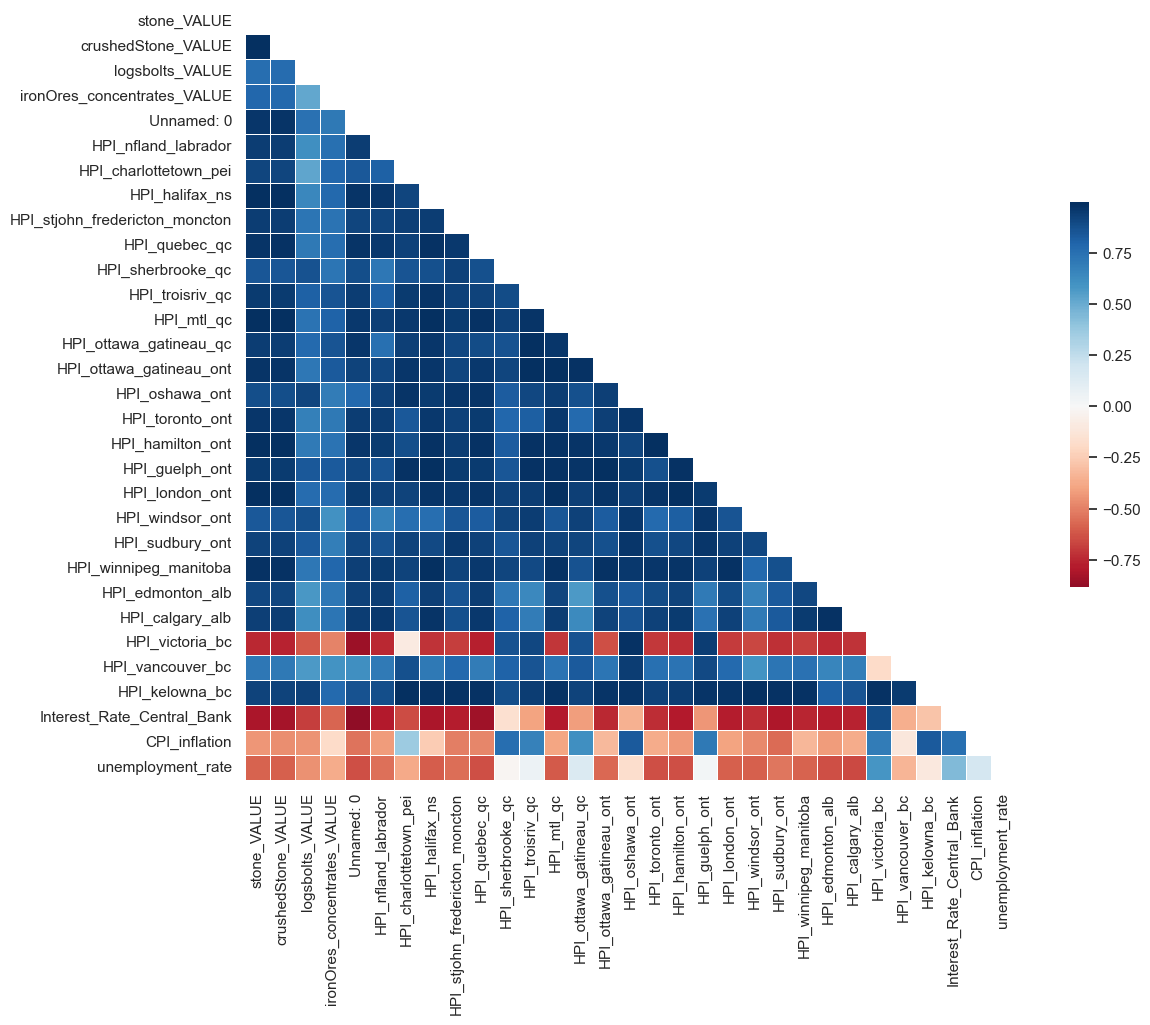

In [40]:
#Visualizing the Correlation Matrix with colors, HeatMap, showing the strength
mask = np.triu(np.ones_like(corr, dtype = np.bool))

f, ax = plt.subplots(figsize=(14,10))

#Heatmap colors
cmap = "RdBu"

sns.heatmap(
    corr,
    mask = mask,
    cmap = cmap,
    center = 0,
    square = True,
    linewidths = 0.5, 
    cbar_kws ={"shrink": 0.5},
)

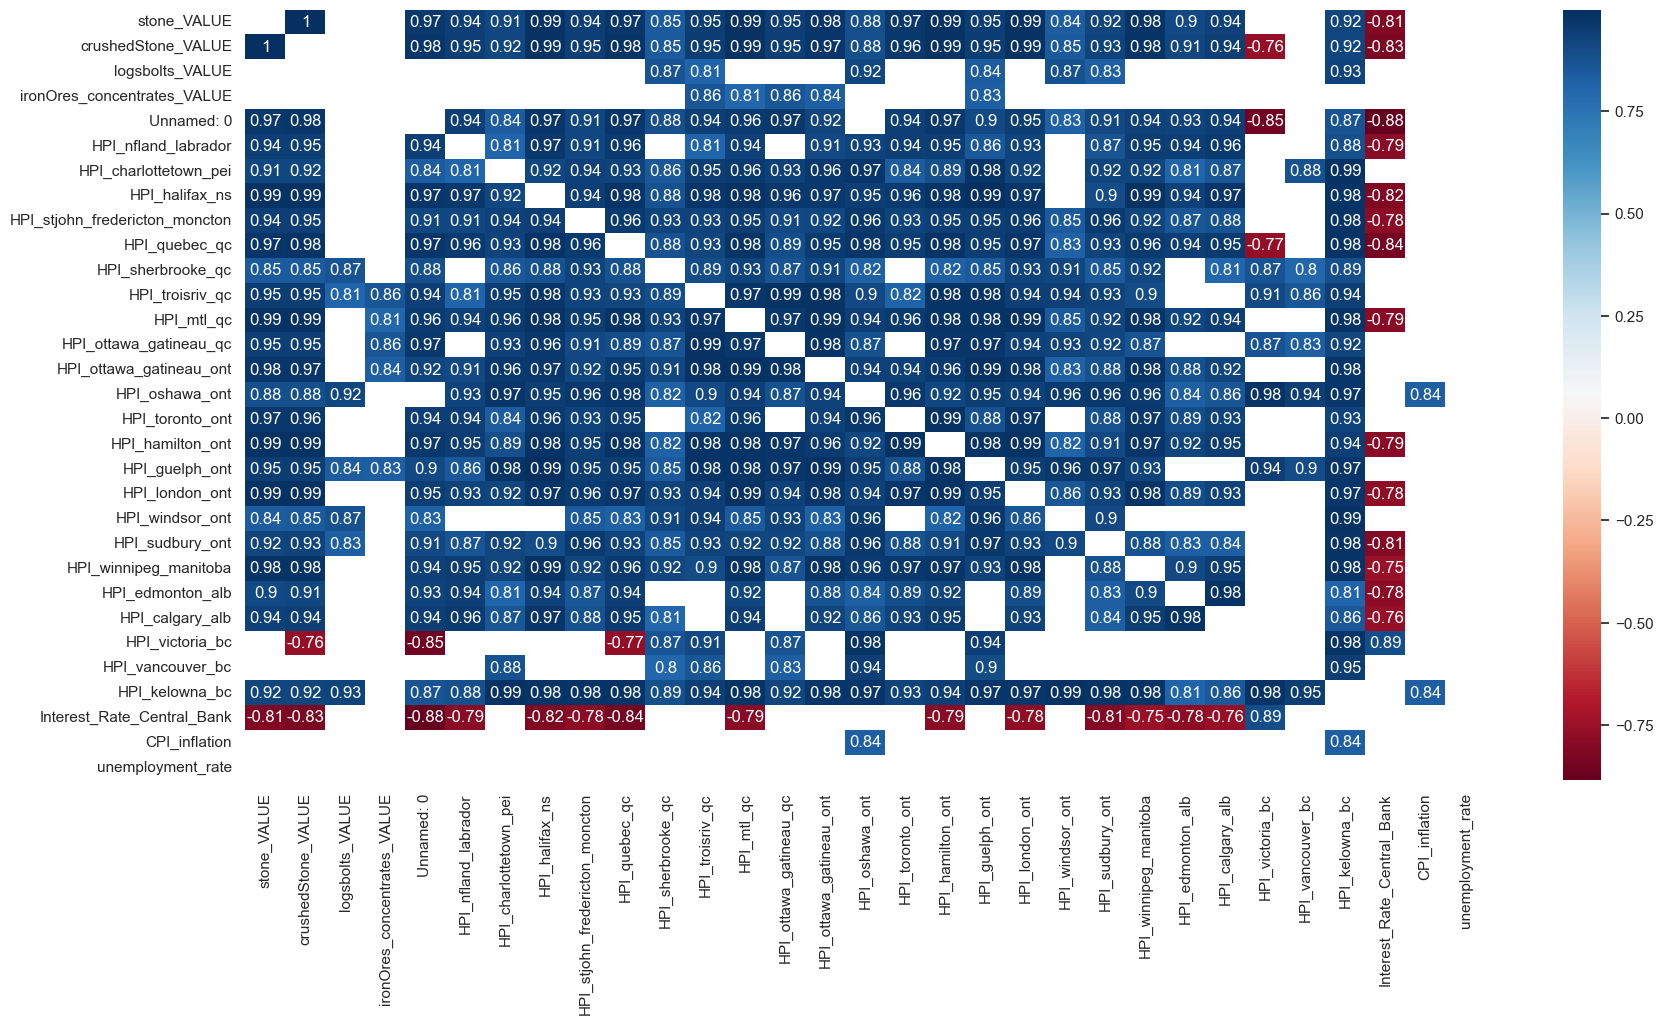

In [41]:
#Filtering values in our correlation Matrix
 
dfCorr = hpi_econo_and_constmaterial_merged_df.corr()
filteredDf = dfCorr[((dfCorr >= .8) | (dfCorr <= -.75)) & (dfCorr !=1.000)]
plt.figure(figsize=(20,10))
sns.heatmap(filteredDf, annot=True, cmap="RdBu")
plt.show()

<AxesSubplot:title={'center':'HPI, Econ.metric and building construction price indexes Correlation'}>

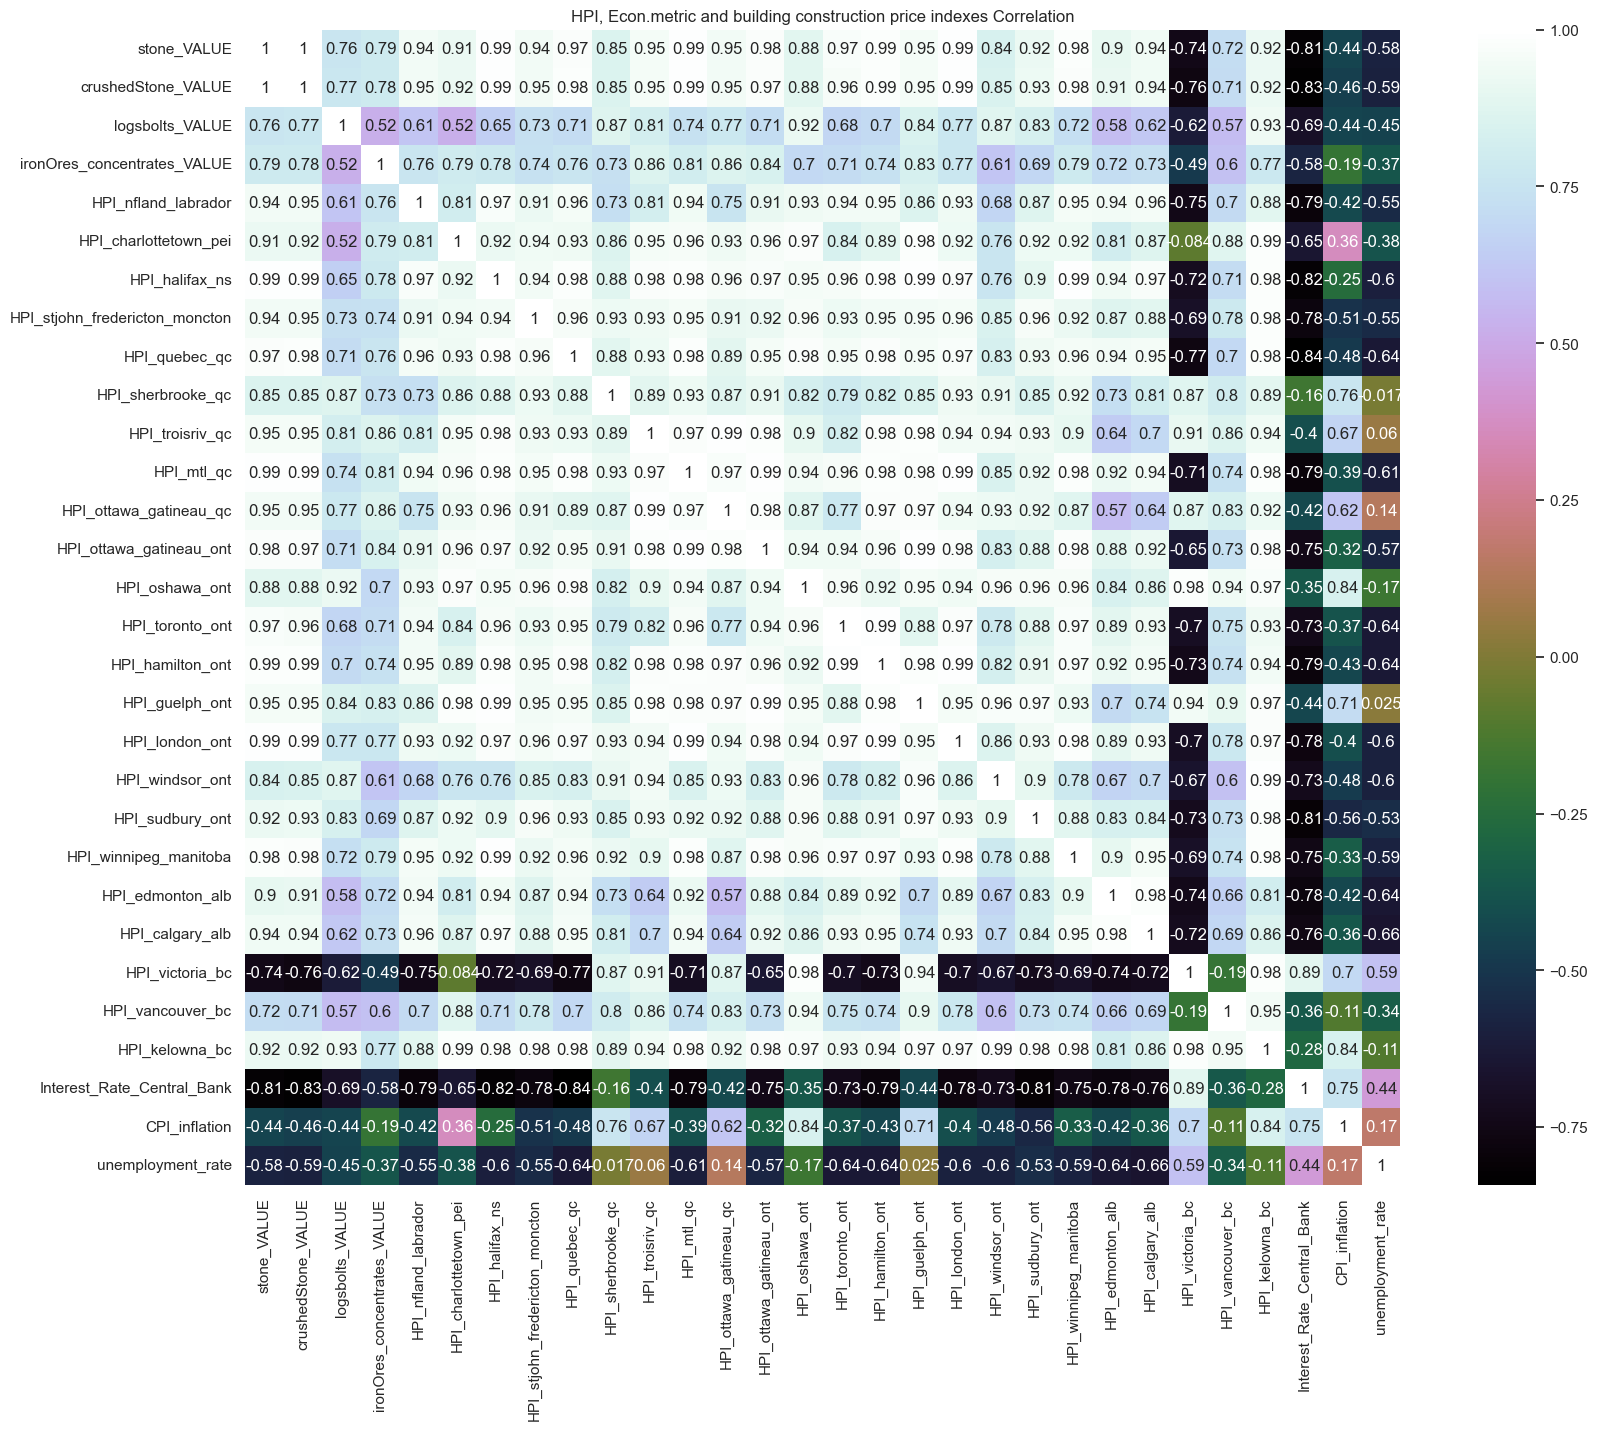

In [44]:
# loading the CSV with HPI , Economy data and Building construction price indexes
from matplotlib import pyplot

df2 = pd.read_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Processed Data\hpi_econo_and_constmaterial_merged_df.csv")
# Dropping useless columns
del df2["Unnamed: 0"]
del df2["REF_DATE"]

correlation = df2.corr()

# Plotting figures & heatmap
plt.figure(figsize = (20, 15))
plt.title("HPI, Econ.metric and building construction price indexes Correlation")
sns.heatmap(correlation, vmax = 1, square = True, annot = True, cmap = 'cubehelix')

<Figure size 2400x2400 with 0 Axes>

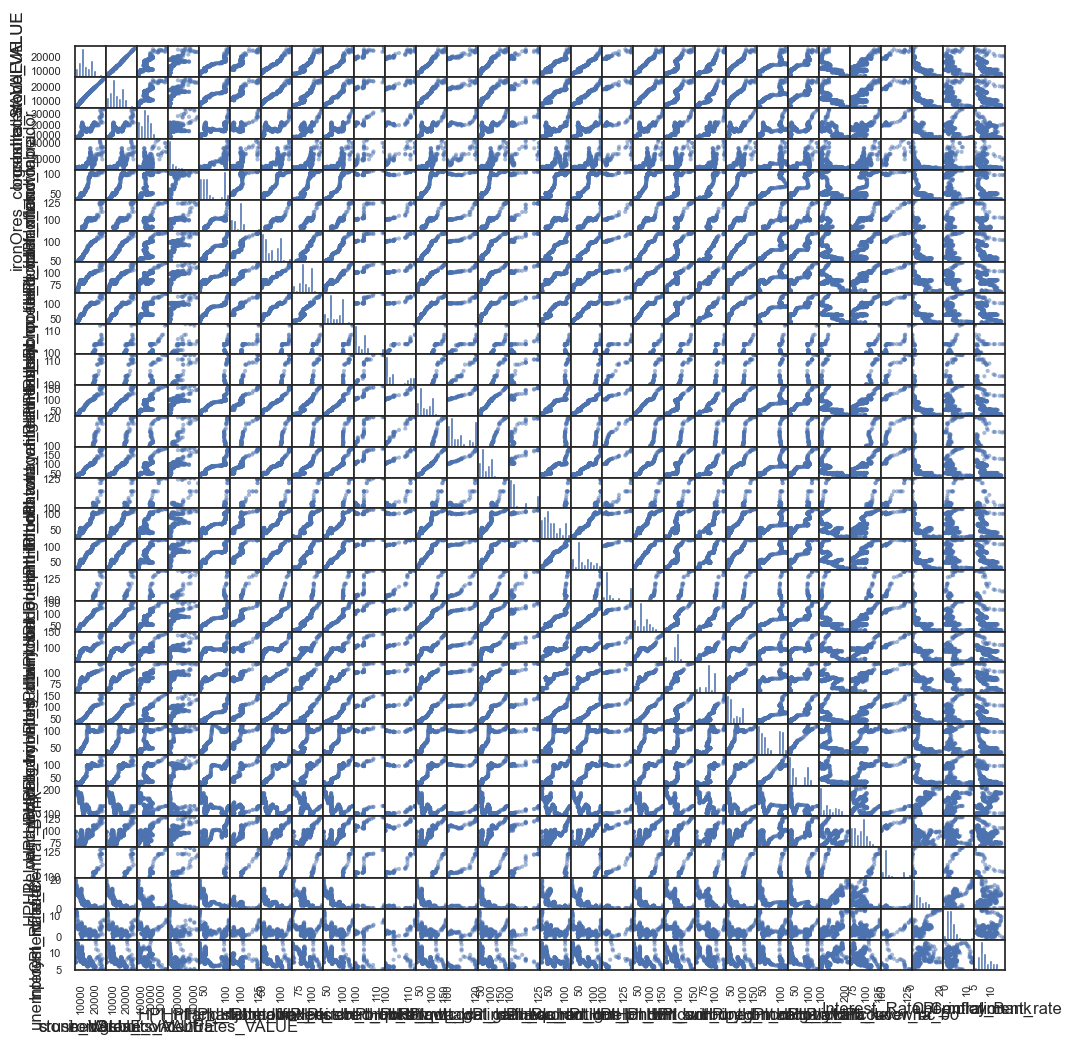

In [46]:
# Let's visualize the relationshup between all the variables in the regression with a scatterplot matrix 

plt.figure(figsize = (24, 24))
scatter_matrix(df2, figsize=(12, 12))
plt.show()

In [ ]:
res 